# Conclusion

Dataset contains stats accumulated for team vs. a unique team.

XGBoost with kfolds=5, and pruned parameter values found with `RandomizedSearchCV`.

## HOME_TEAM_WINS

Target to beat - 59.1% home winrate

Achieved - **73% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|71%|69%|68%|
|max_depth|73%|72%|69%|
|reg_lambda|71%|70%|69%|
|learning rate|71%|70%|68%|
|gamma|72%|70%|68%|
|scale_pos_weight|70%|68%|66%|

## HOME_HIGHER_FG_PCT

Target to beat - 55.0% rate of home having higher FGP

Achieved - **70% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|69%|66%|64%|
|max_depth|70%|69%|67%|
|reg_lambda|70%|68%|66%|
|learning rate|69%|67%|65%|
|gamma|69%|66%|63%|
|scale_pos_weight|70%|66%|64%|

## HOME_HIGHER_FG3_PCT

Target to beat - 50.8% rate of home having higher FG3

Achieved - **62% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|60%|59%|58%|
|max_depth|61%|58%|56%|
|reg_lambda|62%|58%|56%|
|learning rate|62%|59%|56%|
|gamma|60%|57%|54%|
|scale_pos_weight|59%|57%|55%|

## HOME_HIGHER_FT_PCT

Target to beat - 49.5% rate of home having higher FTP

Achieved - **62% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|60%|58%|53%|
|max_depth|62%|57%|54%|
|reg_lambda|58%|56%|54%|
|learning rate|61%|59%|57%|
|gamma|60%|56%|52%|
|scale_pos_weight|59%|57%|53%|

## HOME_HIGHER_AST

Target to beat - 55.0% rate of home having higher AST

Achieved - **67% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|66%|65%|64%|
|max_depth|68%|67%|66%|
|reg_lambda|67%|66%|65%|
|learning rate|67%|65%|64%|
|gamma|66%|64%|62%|
|scale_pos_weight|66%|64%|61%|

## HOME_HIGHER_REB

Target to beat - 53.4% rate of home having higher REB

Achieved - **67% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|66%|63%|61%|
|max_depth|67%|65%|63%|
|reg_lambda|65%|63%|62%|
|learning rate|66%|63%|61%|
|gamma|66%|58%|53%|
|scale_pos_weight|66%|61%|53%|


In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
games_df, winners_df, greater_fgp_df, greater_fg3_df, greater_ft_df, greater_ast_df, greater_reb_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = \
    Local.get_all_dataset_dataframes('../../datasets/')

In [3]:
team_v_team_stats_df = Local.get_team_v_team_stats_dataframe('../../datasets/')

# Target datasets

- Home has:
    - 59.1% Winrate
    - 55.0% Rate of Higher FGP
    - 50.8% Rate of Higher FG3
    - 49.5% Rate of Higher FTP
    - 55.0% Rate of Higher AST
    - 53.4% Rate of Higher REB

In [4]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [5]:
winners_df.describe()

count    23520.000000
mean         0.591029
std          0.491654
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

In [6]:
greater_fgp_df.describe()

count    23520.000000
mean         0.550468
std          0.497457
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG_PCT, dtype: float64

In [7]:
greater_fg3_df.describe()

count    23520.000000
mean         0.507993
std          0.499947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG3_PCT, dtype: float64

In [8]:
greater_ft_df.describe()

count    23520.000000
mean         0.494855
std          0.499984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FT_PCT, dtype: float64

In [9]:
greater_ast_df.describe()

count    23520.000000
mean         0.550128
std          0.497491
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_AST, dtype: float64

In [10]:
greater_reb_df.describe()

count    23520.000000
mean         0.533886
std          0.498861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_REB, dtype: float64

# Datasets

In [11]:
games_df

GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
16157    2003-10-05  10300001    1610612762       1610612742    2003   
16156    2003-10-06  10300002    1610612763       1610612749    2003   
16155    2003-10-07  10300009    1610612758       1610612746    2003   
16154    2003-10-07  10300005    1610612757       1610612745    2003   
16153    2003-10-07  10300007    1610612748       1610612755    2003   
...             ...       ...           ...              ...     ...   
4        2020-12-18  12000040    1610612761       1610612748    2020   
3        2020-12-18  12000039    1610612754       1610612755    2020   
2        2020-12-19  12000049    1610612763       1610612737    2020   
1        2020-12-19  12000048    1610612764       1610612765    2020   
0        2020-12-19  12000047    1610612753       1610612766    2020   

       PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  AST_home  REB_home  \
16157      90.0        0.457        0.735         0.143      23.0      41.0   
16156     105.0        0.494        0.618         0.267      25.0      48.0   
16155     101.0        0.467        0.871         0.444      19.0      39.0   
16154     104.0        0.527        0.657         0.429      22.0      33.0   
16153      86.0        0.352        0.647         0.222      15.0      55.0   
...         ...          ...          ...           ...       ...       ...   
4         105.0        0.380        0.737         0.356      27.0      37.0   
3         107.0        0.371        0.692         0.262      19.0      45.0   
2         116.0        0.400        0.744         0.396      21.0      43.0   
1          99.0        0.427        0.625         0.295      24.0      45.0   
0         120.0        0.433        0.792         0.425      23.0      50.0   

       PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  AST_away  REB_away  
16157      85.0        0.447        0.500         0.250      20.0      38.0  
16156      94.0        0.427        0.700         0.154      20.0      43.0  
16155      82.0        0.368        0.609         0.364      13.0      50.0  
16154      80.0        0.470        0.667         0.333      10.0      37.0  
16153      79.0        0.329        0.897         0.143       7.0      44.0  
...         ...          ...          ...           ...       ...       ...  
4         117.0        0.534        0.741         0.514      30.0      51.0  
3         113.0        0.533        0.629         0.355      23.0      48.0  
2         117.0        0.422        0.837         0.297      24.0      47.0  
1          96.0        0.402        0.647         0.326      18.0      51.0  
0         117.0        0.444        0.864         0.439      21.0      52.0  

[23520 rows x 17 columns]

In [12]:
cumulative_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23515  2020-12-18  12000040            1    2020                  2   
23516  2020-12-18  12000039            1    2020                  2   
23517  2020-12-19  12000049            1    2020                  3   
23518  2020-12-19  12000048            1    2020                  2   
23519  2020-12-19  12000047            1    2020                  3   

       GAMES_PLAYED_away  PPG_total_home  FG_PCT_total_home  \
0                      0        0.000000           0.000000   
1                      0        0.000000           0.000000   
2                      0        0.000000           0.000000   
3                      0        0.000000           0.000000   
4                      0        0.000000           0.000000   
...                  ...             ...                ...   
23515                  1      111.500000           0.443500   
23516                  1      105.000000           0.438000   
23517                  3      119.333333           0.466667   
23518                  3      100.000000           0.415000   
23519                  3      112.666667           0.444333   

       FG3_PCT_total_home  FT_PCT_total_home  ...  PPG_total_away  \
0                0.000000           0.000000  ...        0.000000   
1                0.000000           0.000000  ...        0.000000   
2                0.000000           0.000000  ...        0.000000   
3                0.000000           0.000000  ...        0.000000   
4                0.000000           0.000000  ...        0.000000   
...                   ...                ...  ...             ...   
23515            0.353000           0.691000  ...       92.000000   
23516            0.383000           0.619000  ...      108.000000   
23517            0.329333           0.704667  ...      111.333333   
23518            0.321500           0.704500  ...       93.333333   
23519            0.305333           0.758000  ...      110.666667   

       FG_PCT_total_away  FG3_PCT_total_away  FT_PCT_total_away  \
0               0.000000            0.000000           0.000000   
1               0.000000            0.000000           0.000000   
2               0.000000            0.000000           0.000000   
3               0.000000            0.000000           0.000000   
4               0.000000            0.000000           0.000000   
...                  ...                 ...                ...   
23515           0.427000            0.283000           0.818000   
23516           0.471000            0.241000           0.750000   
23517           0.392667            0.332333           0.789667   
23518           0.413333            0.333000           0.713000   
23519           0.442333            0.372333           0.751000   

       APG_total_away  RPG_total_away  TEAM_ID_away  TEAM_ID_home  W_PCT_away  \
0            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
1            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
2            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
3            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
4            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
...               ...             ...           ...           ...         ...   
23515       26.000000       35.000000  1.610613e+09  1.610613e+09    0.000000   
23516       23.000000       42.000000  1.610613e+09  1.610613e+09    1.000000   
23517       24.000000       56.000000  1

In [13]:
team_v_team_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23511  2020-12-18  12000044            1    2020                  1   
23516  2020-12-18  12000039            1    2020                  0   
23518  2020-12-19  12000048            1    2020                  1   
23517  2020-12-19  12000049            1    2020                  1   
23519  2020-12-19  12000047            1    2020                  1   

       GAMES_PLAYED_away  FG3_PCT_total_home  PPG_total_home  \
0                      0               0.000             0.0   
1                      0               0.000             0.0   
2                      0               0.000             0.0   
3                      0               0.000             0.0   
4                      0               0.000             0.0   
...                  ...                 ...             ...   
23511                  1               0.324           103.0   
23516                  0               0.000             0.0   
23518                  1               0.265            86.0   
23517                  1               0.380           128.0   
23519                  1               0.324           115.0   

       FG_PCT_total_home  RPG_total_home  ...  FG3_PCT_total_away  \
0                  0.000             0.0  ...               0.000   
1                  0.000             0.0  ...               0.000   
2                  0.000             0.0  ...               0.000   
3                  0.000             0.0  ...               0.000   
4                  0.000             0.0  ...               0.000   
...                  ...             ...  ...                 ...   
23511              0.381            46.0  ...               0.333   
23516              0.000             0.0  ...               0.000   
23518              0.397            42.0  ...               0.400   
23517              0.474            58.0  ...               0.289   
23519              0.474            53.0  ...               0.439   

       PPG_total_away  FG_PCT_total_away  RPG_total_away  FT_PCT_total_away  \
0                 0.0              0.000             0.0              0.000   
1                 0.0              0.000             0.0              0.000   
2                 0.0              0.000             0.0              0.000   
3                 0.0              0.000             0.0              0.000   
4                 0.0              0.000             0.0              0.000   
...               ...                ...             ...                ...   
23511           124.0              0.542            61.0              0.643   
23516             0.0              0.000             0.0              0.000   
23518            97.0              0.494            42.0              0.583   
23517           106.0              0.381            46.0              0.864   
23519           123.0              0.475            43.0              0.900   

       APG_total_away  TEAM_ID_away  TEAM_ID_home  W_PCT_away  W_PCT_home  
0                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
1                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
2                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
3                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
4                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
...               ...           ...           ...         ...         ...  
23511            26.0  1.610613e+09  1.610613e+09         1.0         0.0  
23516

## Attach target columns to dataset

In [14]:
team_v_team_stats_copy_df = team_v_team_stats_df.copy()
team_v_team_stats_copy_df['home_win'] = winners_df
team_v_team_stats_copy_df['greater_fgp'] = greater_fgp_df
team_v_team_stats_copy_df['greater_fg3'] = greater_fg3_df
team_v_team_stats_copy_df['greater_ft'] = greater_ft_df
team_v_team_stats_copy_df['greater_ast'] = greater_ast_df
team_v_team_stats_copy_df['greater_reb'] = greater_reb_df

## Remove rows w/o data

In [15]:
team_v_team_stats_copy_df = team_v_team_stats_copy_df[(team_v_team_stats_copy_df['GAMES_PLAYED_home']>0) & (team_v_team_stats_copy_df['GAMES_PLAYED_away']>0)]

# Get new target datasets after row removal
winners_df = team_v_team_stats_copy_df['home_win']
greater_fgp_df = team_v_team_stats_copy_df['greater_fgp']
greater_fg3_df = team_v_team_stats_copy_df['greater_fg3']
greater_ft_df = team_v_team_stats_copy_df['greater_ft']
greater_ast_df = team_v_team_stats_copy_df['greater_ast']
greater_reb_df = team_v_team_stats_copy_df['greater_reb']

## Remove non-data

In [16]:
# Delete non-data
for key in [
    'DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away',
    'home_win','greater_fgp','greater_fg3','greater_ft','greater_ast','greater_reb'
]:
    del team_v_team_stats_copy_df[key]

team_v_team_stats_copy_df

FG3_PCT_total_home  PPG_total_home  FG_PCT_total_home  RPG_total_home  \
26                  0.211            78.0              0.329            38.0   
49                  0.000            98.0              0.500            37.0   
44                  0.667            58.0              0.457            31.0   
53                  0.286           104.0              0.493            40.0   
87                  0.250            85.0              0.447            38.0   
...                   ...             ...                ...             ...   
23509               0.310           107.0              0.407            45.0   
23511               0.324           103.0              0.381            46.0   
23518               0.265            86.0              0.397            42.0   
23517               0.380           128.0              0.474            58.0   
23519               0.324           115.0              0.474            53.0   

       FT_PCT_total_home  APG_total_home  FG3_PCT_total_away  PPG_total_away  \
26                 0.737             8.0               0.370            98.0   
49                 0.800            17.0               0.700           105.0   
44                 0.700            10.0               0.300            62.0   
53                 0.700            22.0               0.214            89.0   
87                 0.500            20.0               0.143            90.0   
...                  ...             ...                 ...             ...   
23509              0.800            26.0               0.400           112.0   
23511              0.680            22.0               0.333           124.0   
23518              0.682            18.0               0.400            97.0   
23517              0.773            33.0               0.289           106.0   
23519              0.917            26.0               0.439           123.0   

       FG_PCT_total_away  RPG_total_away  FT_PCT_total_away  APG_total_away  \
26                 0.413            42.0              0.703            22.0   
49                 0.527            39.0              0.714            27.0   
44                 0.385            30.0              0.576            11.0   
53                 0.462            36.0              0.538            21.0   
87                 0.457            41.0              0.735            23.0   
...                  ...             ...                ...             ...   
23509              0.476            47.0              0.750            20.0   
23511              0.542            61.0              0.643            26.0   
23518              0.494            42.0              0.583            20.0   
23517              0.381            46.0              0.864            25.0   
23519              0.475            43.0              0.900            32.0   

       W_PCT_away  W_PCT_home  
26            1.0         0.0  
49            1.0         0.0  
44            1.0         0.0  
53            0.0         1.0  
87            1.0         0.0  
...           ...         ...  
23509         1.0         0.0  
23511         1.0         0.0  
23518         1.0         0.0  
23517         0.0         1.0  
23519         1.0         0.0  

[16034 rows x 14 columns]

## Do hyperparameters searches

In [17]:
from sklearn.metrics import classification_report

In [18]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [19]:
from sklearn.utils.class_weight import compute_sample_weight

In [20]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
#     clf.fit(x, y, sample_weight=compute_sample_weight('balanced',y))
    clf.fit(x, y)
    return clf

## Plot feature importances

In [21]:
def plot_feature_importances(clf, X, y):
    viz = FeatureImportances(clf, labels=X.columns)
    viz.fit(X, y)
    viz.show()

In [22]:
def print_all_metrics_and_plot(clf, X_train_dict, X_test_dict, y_train_dict, y_test_dict, grid_cv_params):
    scores = []
    for key in X_train_dict.keys():
        cv_clf = do_cv(
            clf,
#             GridSearchCV,
            RandomizedSearchCV,
            grid_cv_params,
            X_train_dict[key],
            y_train_dict[key],
        )
        print(key.upper()+':\n')
        score = cv_clf.best_estimator_.score(X_test_dict[key], y_test_dict[key])
        scores.append(score)
        print('Best XGBoost accuracy (%s): %.2f' % (str(cv_clf.best_params_), score))
        print(classification_report(y_test_dict[key], cv_clf.best_estimator_.predict(X_test_dict[key])))
        plot_feature_importances(cv_clf.best_estimator_, X_train_dict[key], y_train_dict[key])
        print('---------------------------------------------')
    return scores

## Build K-folds datasets

In [23]:
from imblearn.combine import SMOTEENN

In [24]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=123)

X_train_dicts = []
X_test_dicts = []
y_train_dicts = []
y_test_dicts = []

for target, key in [(winners_df, 'winner'), (greater_fgp_df, 'fgp'), (greater_fg3_df, 'fg3'), (greater_ft_df, 'ft'), (greater_ast_df, 'ast'), (greater_reb_df, 'reb')]:
    X_over, y_over = SMOTEENN(sampling_strategy='all').fit_resample(team_v_team_stats_copy_df, target)
    for train, test in kf.split(X_over, y_over):
        X_train_dict = {}
        X_test_dict = {}
        y_train_dict = {}
        y_test_dict = {}
        
        X_train_dict[key], X_test_dict[key] = X_over.iloc[train], X_over.iloc[test]
        y_train_dict[key], y_test_dict[key] = y_over.iloc[train], y_over.iloc[test]
        
        X_train_dicts.append(X_train_dict)
        X_test_dicts.append(X_test_dict)
        y_train_dicts.append(y_train_dict)
        y_test_dicts.append(y_test_dict)

assert len(X_train_dicts)==len(X_test_dicts)==len(y_train_dicts)==len(y_test_dicts)
print(len(X_train_dicts))

30


In [25]:
def print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, params):
    scores=[]
    for i in range(len(X_train_dicts)):
        print(f'i={i}')
        score = print_all_metrics_and_plot(
            xgb.XGBClassifier(random_state=0,eval_metric='logloss'),
            X_train_dicts[i],
            X_test_dicts[i],
            y_train_dicts[i],
            y_test_dicts[i],
            params,
        )
        if (i+1)%5==0:
            scores = pd.DataFrame(np.array(scores))
            print(f'Mean accuracy: {scores.mean()[0]}')
            print(f'Max accuracy: {scores.max()[0]}')
            print(f'Min accuracy: {scores.min()[0]}')
            print('=========================================')
            scores=[]
        else:
            scores += score

## Train w/o pruning

In [26]:
import warnings
warnings.filterwarnings("ignore")

i=0
WINNER:

Best XGBoost accuracy ({}): 0.69
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       627
           1       0.58      0.43      0.49       346

    accuracy                           0.69       973
   macro avg       0.65      0.63      0.63       973
weighted avg       0.67      0.69      0.67       973



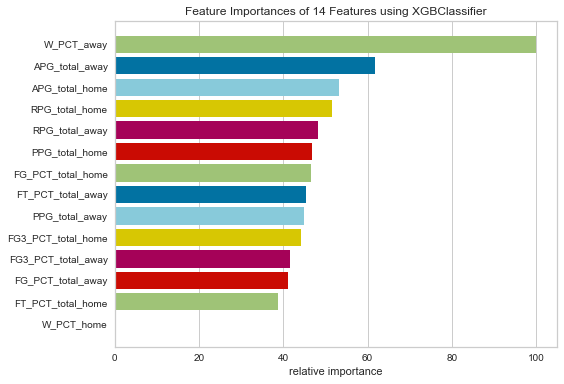

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({}): 0.70
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       653
           1       0.55      0.49      0.52       320

    accuracy                           0.70       973
   macro avg       0.66      0.65      0.65       973
weighted avg       0.69      0.70      0.70       973



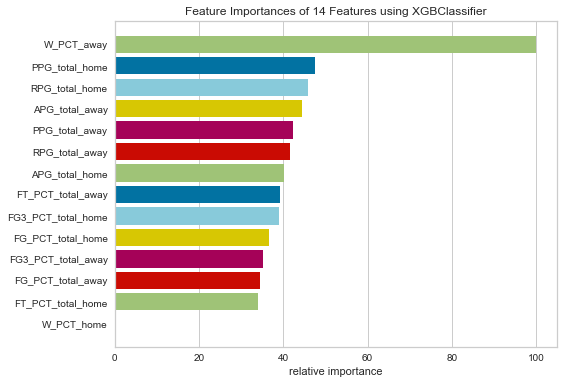

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({}): 0.68
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       596
           1       0.64      0.41      0.50       377

    accuracy                           0.68       973
   macro avg       0.67      0.63      0.63       973
weighted avg       0.67      0.68      0.66       973



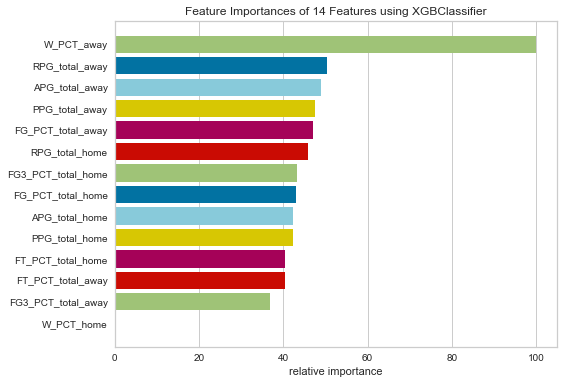

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({}): 0.72
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       648
           1       0.60      0.46      0.52       325

    accuracy                           0.72       973
   macro avg       0.68      0.65      0.66       973
weighted avg       0.71      0.72      0.71       973



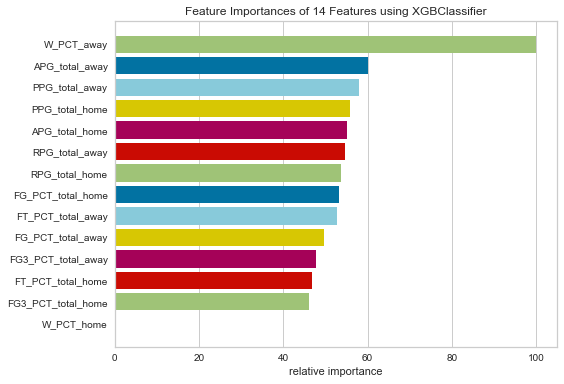

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({}): 0.69
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       606
           1       0.64      0.39      0.48       367

    accuracy                           0.69       973
   macro avg       0.67      0.63      0.63       973
weighted avg       0.68      0.69      0.66       973



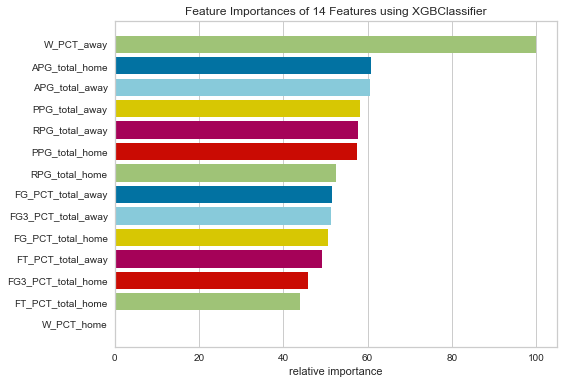

---------------------------------------------
Mean accuracy: 0.6968139773895169
Max accuracy: 0.7183967112024666
Min accuracy: 0.6813977389516958
i=5
FGP:

Best XGBoost accuracy ({}): 0.65
              precision    recall  f1-score   support

           0       0.67      0.81      0.74       423
           1       0.59      0.41      0.48       279

    accuracy                           0.65       702
   macro avg       0.63      0.61      0.61       702
weighted avg       0.64      0.65      0.63       702



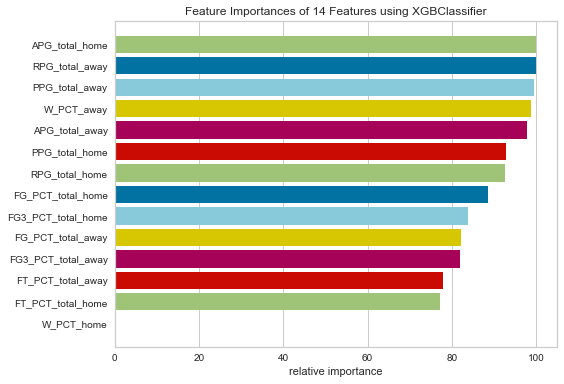

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       420
           1       0.63      0.44      0.52       282

    accuracy                           0.67       702
   macro avg       0.66      0.63      0.64       702
weighted avg       0.67      0.67      0.66       702



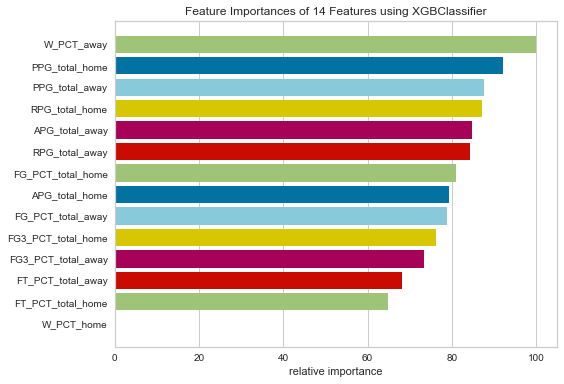

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({}): 0.70
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       424
           1       0.65      0.50      0.57       278

    accuracy                           0.70       702
   macro avg       0.68      0.66      0.67       702
weighted avg       0.69      0.70      0.69       702



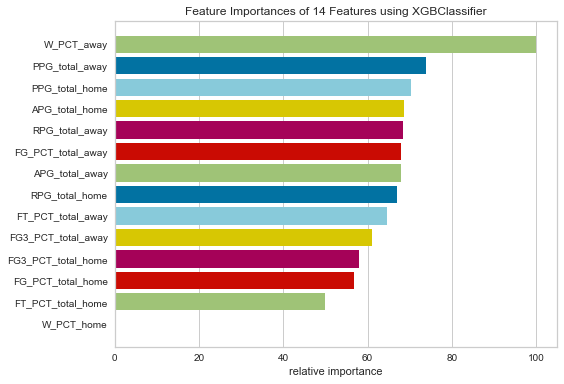

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({}): 0.66
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       438
           1       0.57      0.40      0.47       263

    accuracy                           0.66       701
   macro avg       0.63      0.61      0.61       701
weighted avg       0.65      0.66      0.64       701



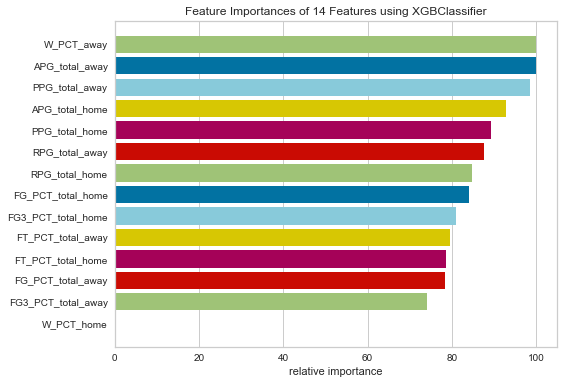

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({}): 0.68
              precision    recall  f1-score   support

           0       0.69      0.83      0.76       418
           1       0.65      0.46      0.54       283

    accuracy                           0.68       701
   macro avg       0.67      0.65      0.65       701
weighted avg       0.68      0.68      0.67       701



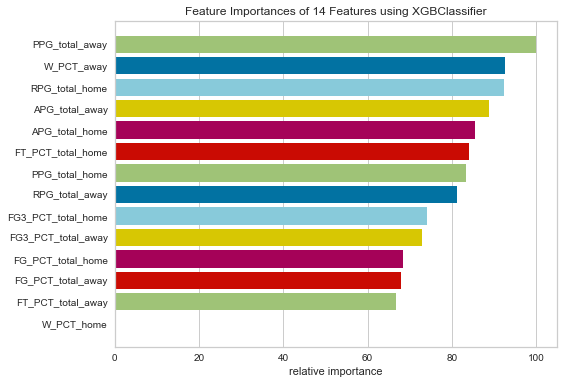

---------------------------------------------
Mean accuracy: 0.6697508849791303
Max accuracy: 0.6965811965811965
Min accuracy: 0.6495726495726496
i=10
FG3:

Best XGBoost accuracy ({}): 0.59
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       231
           1       0.57      0.57      0.57       214

    accuracy                           0.59       445
   macro avg       0.59      0.59      0.59       445
weighted avg       0.59      0.59      0.59       445



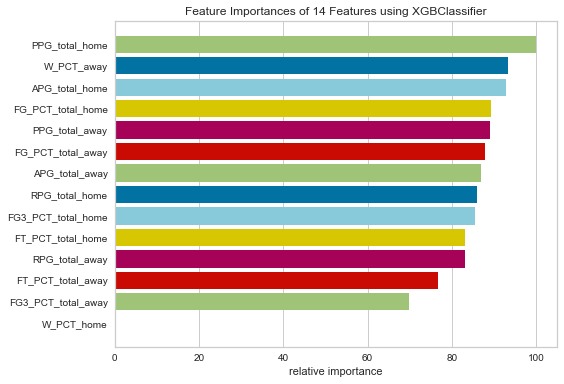

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({}): 0.59
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       240
           1       0.55      0.54      0.54       205

    accuracy                           0.59       445
   macro avg       0.58      0.58      0.58       445
weighted avg       0.59      0.59      0.59       445



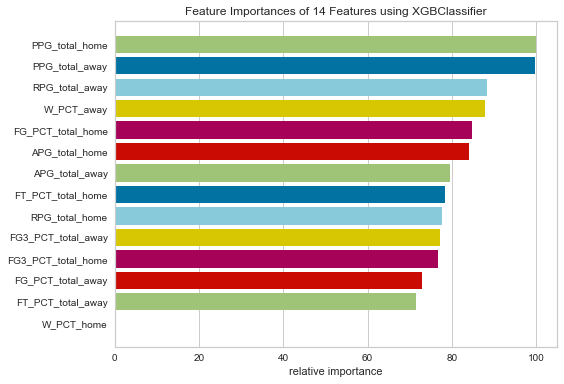

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({}): 0.60
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       226
           1       0.61      0.56      0.58       219

    accuracy                           0.60       445
   macro avg       0.60      0.60      0.60       445
weighted avg       0.60      0.60      0.60       445



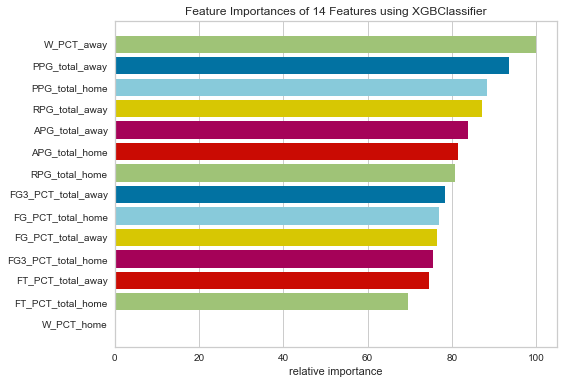

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.66      0.63       227
           1       0.61      0.56      0.58       218

    accuracy                           0.61       445
   macro avg       0.61      0.61      0.61       445
weighted avg       0.61      0.61      0.61       445



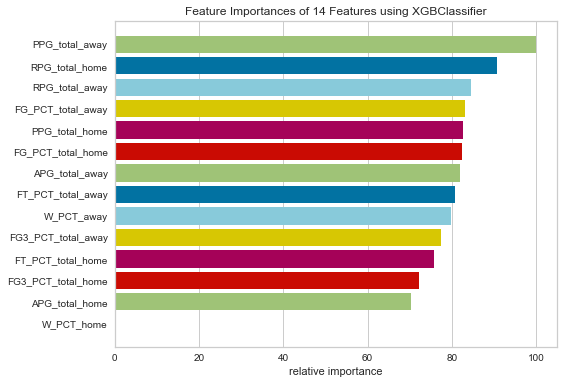

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({}): 0.58
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       230
           1       0.57      0.54      0.55       215

    accuracy                           0.58       445
   macro avg       0.58      0.58      0.58       445
weighted avg       0.58      0.58      0.58       445



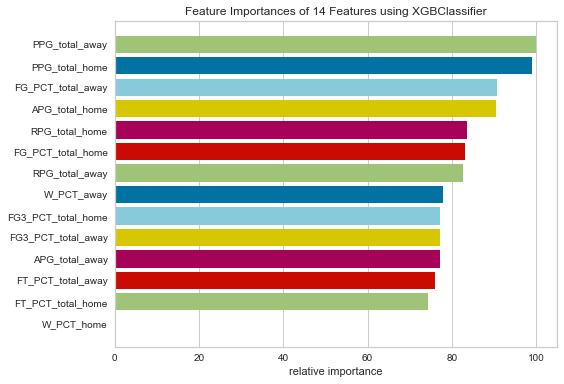

---------------------------------------------
Mean accuracy: 0.5966292134831461
Max accuracy: 0.6089887640449438
Min accuracy: 0.5865168539325842
i=15
FT:

Best XGBoost accuracy ({}): 0.53
              precision    recall  f1-score   support

           0       0.48      0.51      0.49       196
           1       0.58      0.55      0.57       244

    accuracy                           0.53       440
   macro avg       0.53      0.53      0.53       440
weighted avg       0.54      0.53      0.54       440



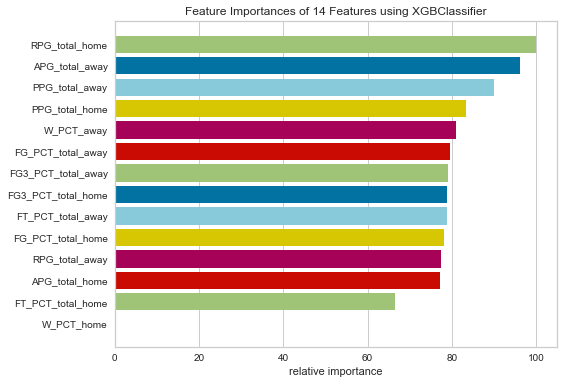

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({}): 0.58
              precision    recall  f1-score   support

           0       0.61      0.53      0.57       231
           1       0.55      0.63      0.58       208

    accuracy                           0.58       439
   macro avg       0.58      0.58      0.58       439
weighted avg       0.58      0.58      0.58       439



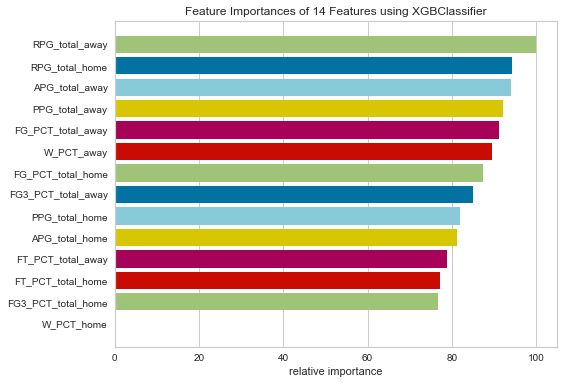

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({}): 0.61
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       213
           1       0.62      0.64      0.63       226

    accuracy                           0.61       439
   macro avg       0.61      0.61      0.61       439
weighted avg       0.61      0.61      0.61       439



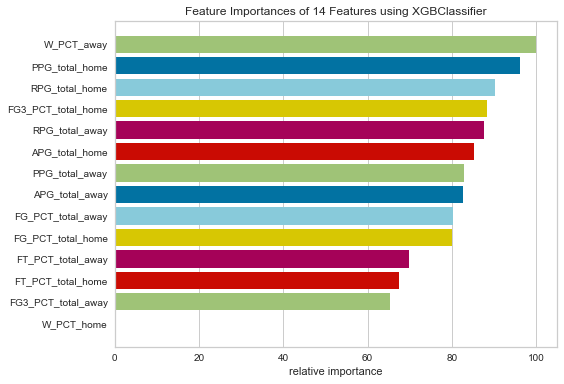

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({}): 0.61
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       209
           1       0.63      0.61      0.62       230

    accuracy                           0.61       439
   macro avg       0.61      0.61      0.61       439
weighted avg       0.61      0.61      0.61       439



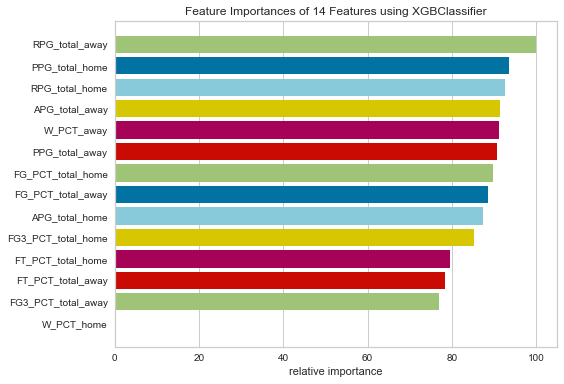

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       211
           1       0.61      0.61      0.61       228

    accuracy                           0.59       439
   macro avg       0.59      0.59      0.59       439
weighted avg       0.59      0.59      0.59       439



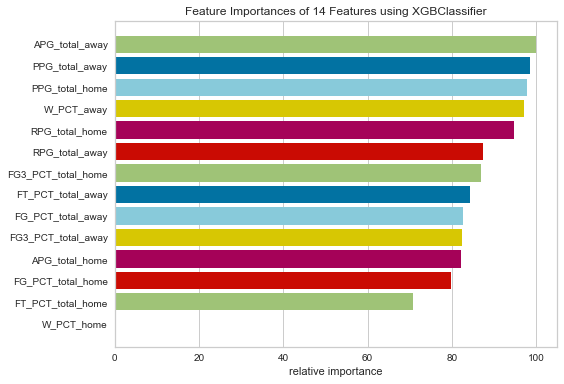

---------------------------------------------
Mean accuracy: 0.5817004038103126
Max accuracy: 0.6082004555808656
Min accuracy: 0.5340909090909091
i=20
AST:

Best XGBoost accuracy ({}): 0.67
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       388
           1       0.63      0.46      0.53       272

    accuracy                           0.67       660
   macro avg       0.65      0.63      0.64       660
weighted avg       0.66      0.67      0.65       660



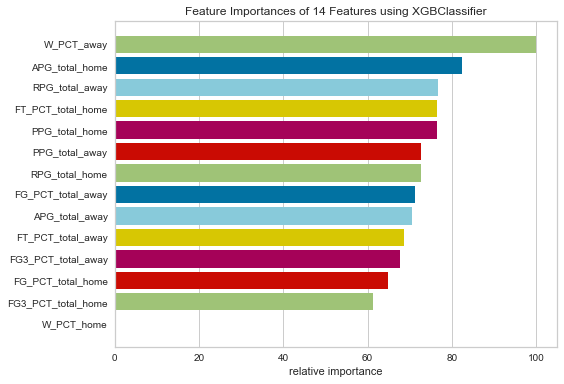

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({}): 0.65
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       390
           1       0.59      0.43      0.50       270

    accuracy                           0.65       660
   macro avg       0.63      0.61      0.61       660
weighted avg       0.64      0.65      0.63       660



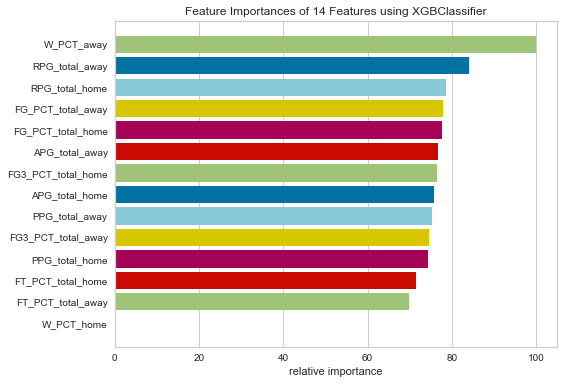

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({}): 0.66
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       403
           1       0.58      0.46      0.52       256

    accuracy                           0.66       659
   macro avg       0.64      0.63      0.63       659
weighted avg       0.65      0.66      0.65       659



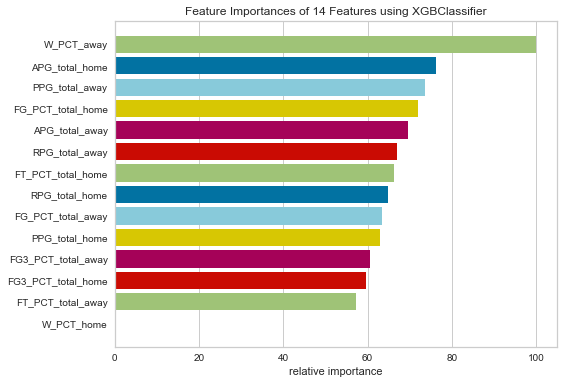

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({}): 0.66
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       411
           1       0.56      0.46      0.50       248

    accuracy                           0.66       659
   macro avg       0.63      0.62      0.62       659
weighted avg       0.65      0.66      0.65       659



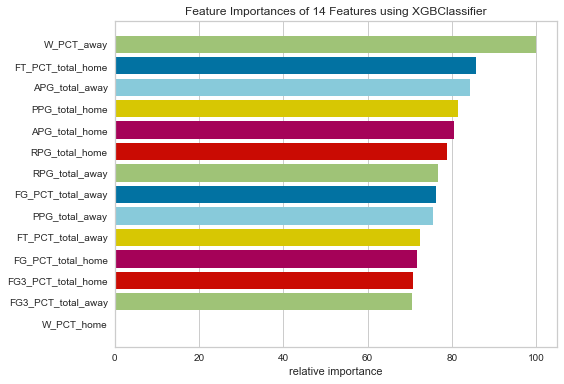

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({}): 0.62
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       391
           1       0.54      0.40      0.46       268

    accuracy                           0.62       659
   macro avg       0.60      0.58      0.58       659
weighted avg       0.61      0.62      0.61       659



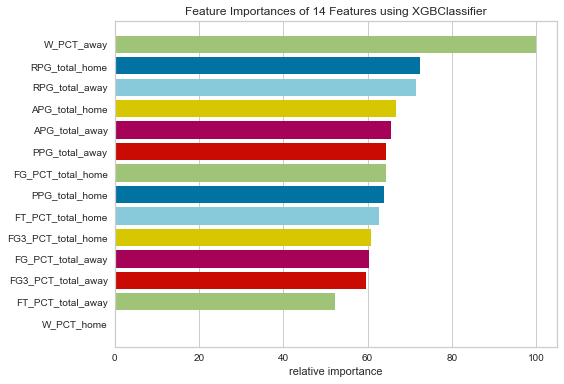

---------------------------------------------
Mean accuracy: 0.6580758265507887
Max accuracy: 0.6651515151515152
Min accuracy: 0.646969696969697
i=25
REB:

Best XGBoost accuracy ({}): 0.64
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       348
           1       0.55      0.53      0.54       230

    accuracy                           0.64       578
   macro avg       0.62      0.62      0.62       578
weighted avg       0.64      0.64      0.64       578



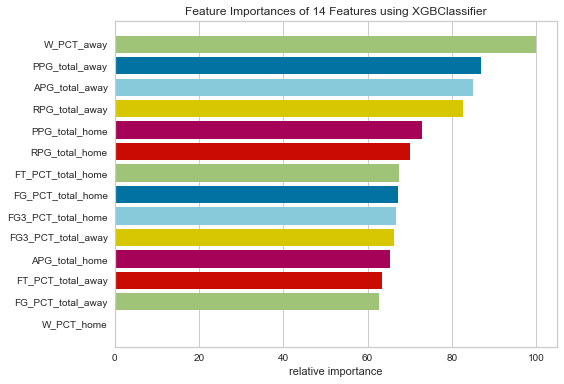

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({}): 0.64
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       324
           1       0.61      0.50      0.55       254

    accuracy                           0.64       578
   macro avg       0.63      0.62      0.62       578
weighted avg       0.63      0.64      0.63       578



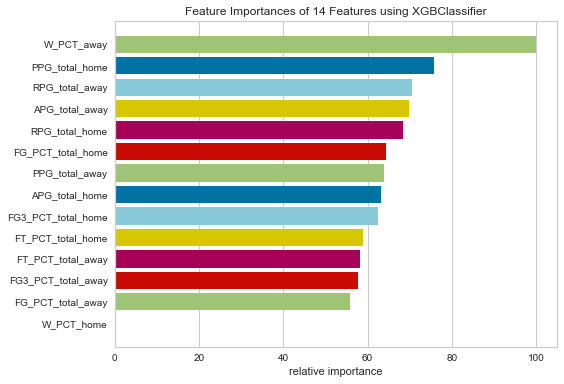

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({}): 0.66
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       367
           1       0.54      0.50      0.52       210

    accuracy                           0.66       577
   macro avg       0.63      0.63      0.63       577
weighted avg       0.66      0.66      0.66       577



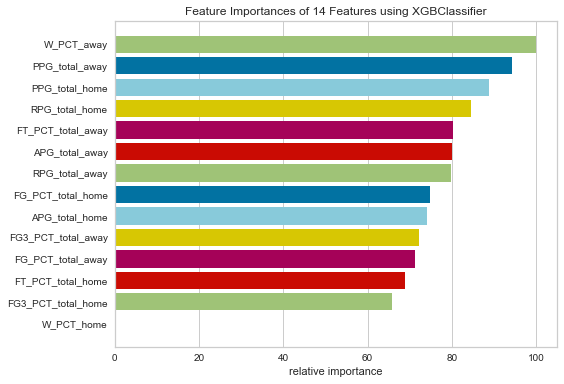

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({}): 0.61
              precision    recall  f1-score   support

           0       0.60      0.79      0.68       308
           1       0.63      0.41      0.50       269

    accuracy                           0.61       577
   macro avg       0.62      0.60      0.59       577
weighted avg       0.62      0.61      0.60       577



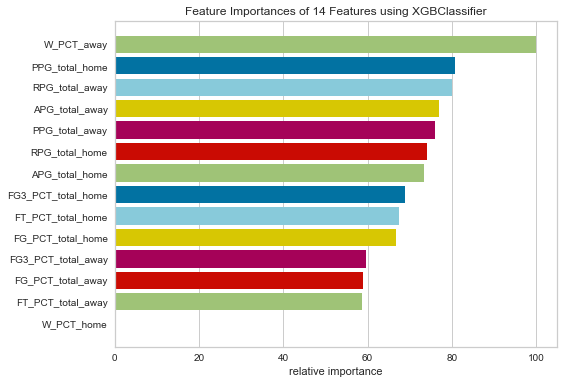

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({}): 0.64
              precision    recall  f1-score   support

           0       0.67      0.74      0.71       339
           1       0.57      0.49      0.53       238

    accuracy                           0.64       577
   macro avg       0.62      0.62      0.62       577
weighted avg       0.63      0.64      0.63       577



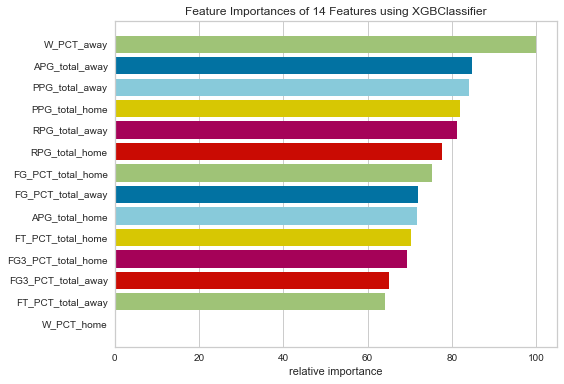

---------------------------------------------
Mean accuracy: 0.6376616912439357
Max accuracy: 0.6620450606585788
Min accuracy: 0.6117850953206239


In [28]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {})

## Try prune max depth

i=0
WINNER:

Best XGBoost accuracy ({'max_depth': 18}): 0.73
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       627
           1       0.68      0.44      0.53       346

    accuracy                           0.73       973
   macro avg       0.71      0.66      0.67       973
weighted avg       0.72      0.73      0.71       973



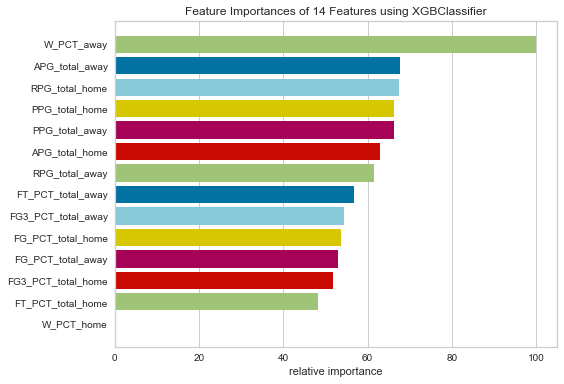

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({'max_depth': 11}): 0.74
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       653
           1       0.63      0.51      0.56       320

    accuracy                           0.74       973
   macro avg       0.70      0.68      0.69       973
weighted avg       0.73      0.74      0.73       973



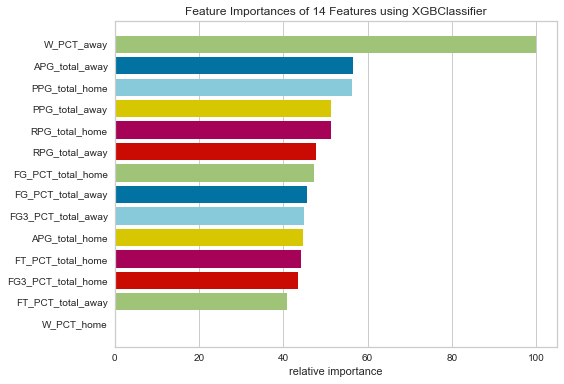

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({'max_depth': 21}): 0.69
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       596
           1       0.66      0.43      0.52       377

    accuracy                           0.69       973
   macro avg       0.68      0.65      0.65       973
weighted avg       0.69      0.69      0.68       973



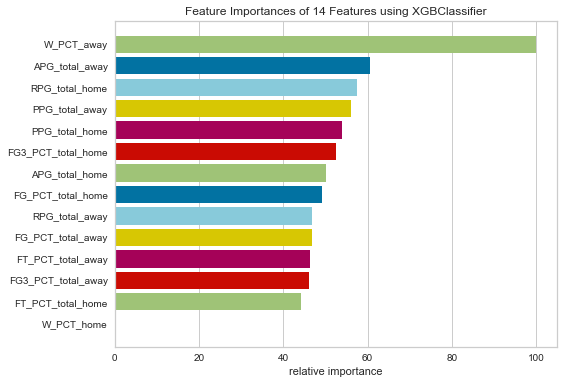

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({'max_depth': 21}): 0.74
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       648
           1       0.64      0.49      0.55       325

    accuracy                           0.74       973
   macro avg       0.70      0.67      0.68       973
weighted avg       0.73      0.74      0.73       973



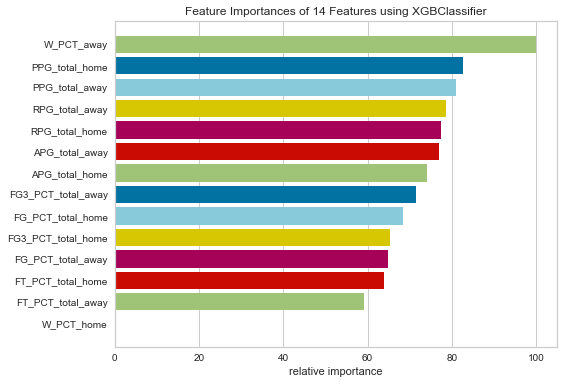

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({'max_depth': 24}): 0.71
              precision    recall  f1-score   support

           0       0.71      0.90      0.80       606
           1       0.71      0.40      0.52       367

    accuracy                           0.71       973
   macro avg       0.71      0.65      0.66       973
weighted avg       0.71      0.71      0.69       973



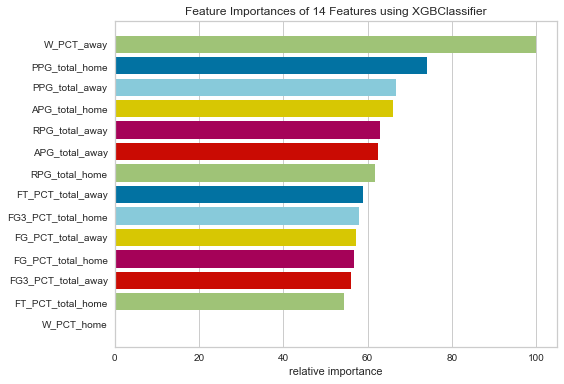

---------------------------------------------
Mean accuracy: 0.724049331963001
Max accuracy: 0.7389516957862282
Min accuracy: 0.6937307297019527
i=5
FGP:

Best XGBoost accuracy ({'max_depth': 28}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       423
           1       0.63      0.43      0.51       279

    accuracy                           0.67       702
   macro avg       0.66      0.63      0.63       702
weighted avg       0.66      0.67      0.66       702



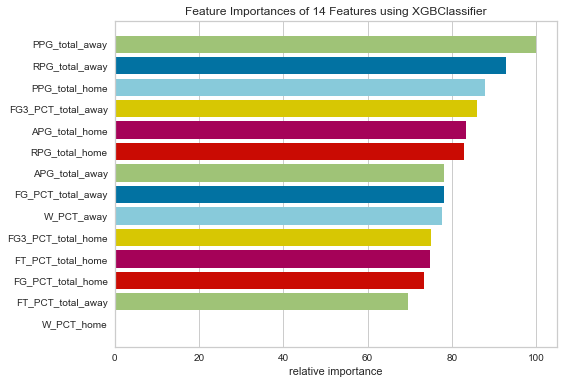

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({'max_depth': 8}): 0.69
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       420
           1       0.65      0.49      0.56       282

    accuracy                           0.69       702
   macro avg       0.68      0.66      0.66       702
weighted avg       0.69      0.69      0.68       702



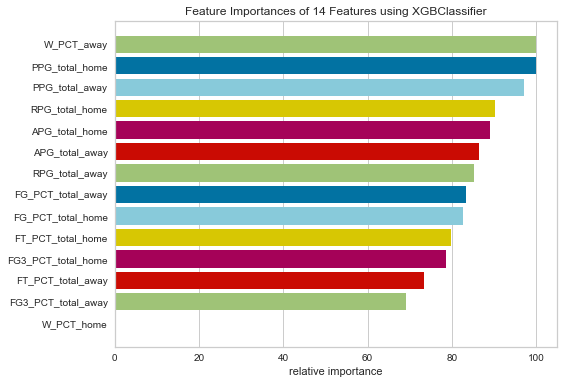

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({'max_depth': 12}): 0.71
              precision    recall  f1-score   support

           0       0.73      0.83      0.77       424
           1       0.67      0.53      0.59       278

    accuracy                           0.71       702
   macro avg       0.70      0.68      0.68       702
weighted avg       0.70      0.71      0.70       702



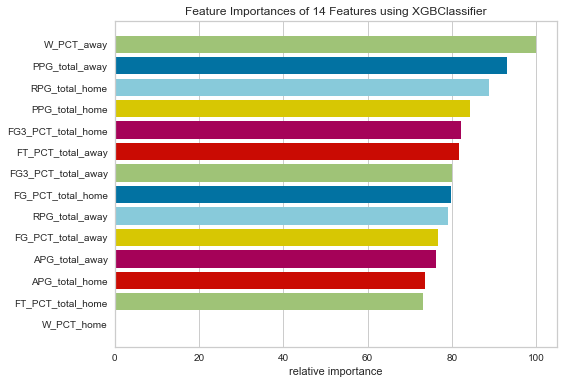

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({'max_depth': 19}): 0.70
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       438
           1       0.64      0.45      0.53       263

    accuracy                           0.70       701
   macro avg       0.68      0.65      0.65       701
weighted avg       0.69      0.70      0.69       701



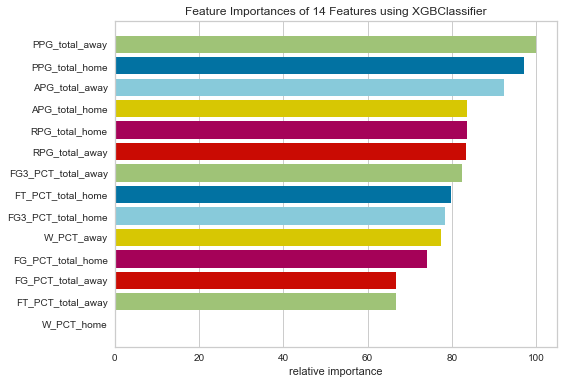

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({'max_depth': 15}): 0.69
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       418
           1       0.68      0.47      0.55       283

    accuracy                           0.69       701
   macro avg       0.69      0.66      0.66       701
weighted avg       0.69      0.69      0.68       701



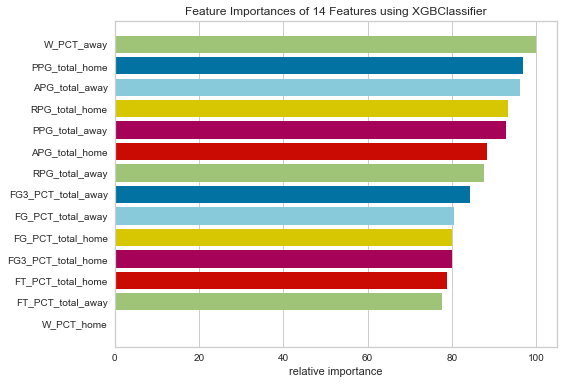

---------------------------------------------
Mean accuracy: 0.6929132578205331
Max accuracy: 0.707977207977208
Min accuracy: 0.6723646723646723
i=10
FG3:

Best XGBoost accuracy ({'max_depth': 25}): 0.57
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       231
           1       0.55      0.56      0.55       214

    accuracy                           0.57       445
   macro avg       0.57      0.57      0.57       445
weighted avg       0.57      0.57      0.57       445



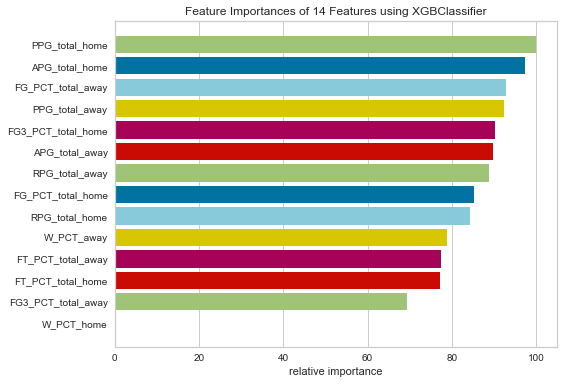

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({'max_depth': 28}): 0.58
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       240
           1       0.54      0.52      0.53       205

    accuracy                           0.58       445
   macro avg       0.57      0.57      0.57       445
weighted avg       0.58      0.58      0.58       445



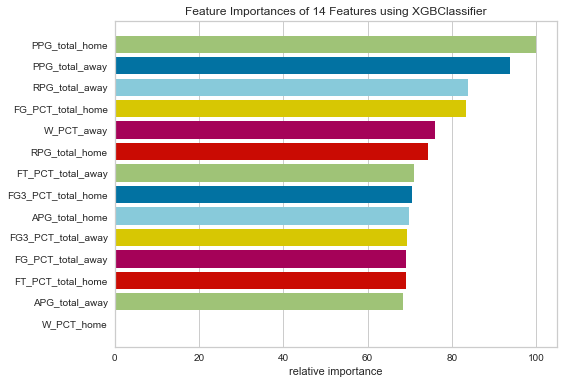

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({'max_depth': 10}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       226
           1       0.61      0.57      0.59       219

    accuracy                           0.61       445
   macro avg       0.61      0.61      0.61       445
weighted avg       0.61      0.61      0.61       445



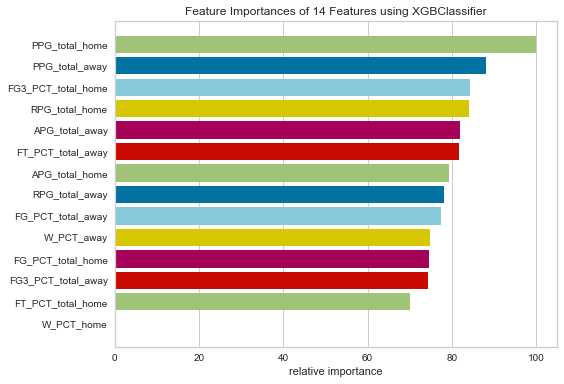

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({'max_depth': 28}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       227
           1       0.59      0.52      0.55       218

    accuracy                           0.59       445
   macro avg       0.59      0.59      0.59       445
weighted avg       0.59      0.59      0.59       445



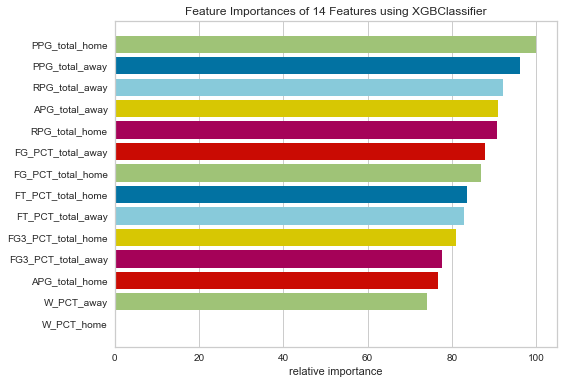

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({'max_depth': 29}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.68      0.64       230
           1       0.61      0.53      0.56       215

    accuracy                           0.61       445
   macro avg       0.61      0.60      0.60       445
weighted avg       0.61      0.61      0.60       445



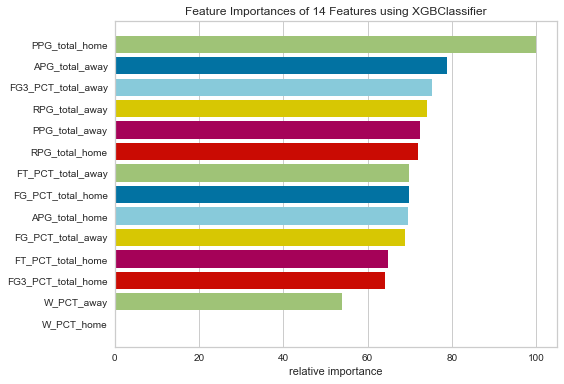

---------------------------------------------
Mean accuracy: 0.5865168539325842
Max accuracy: 0.6112359550561798
Min accuracy: 0.5685393258426966
i=15
FT:

Best XGBoost accuracy ({'max_depth': 18}): 0.55
              precision    recall  f1-score   support

           0       0.49      0.54      0.51       196
           1       0.60      0.55      0.57       244

    accuracy                           0.55       440
   macro avg       0.54      0.54      0.54       440
weighted avg       0.55      0.55      0.55       440



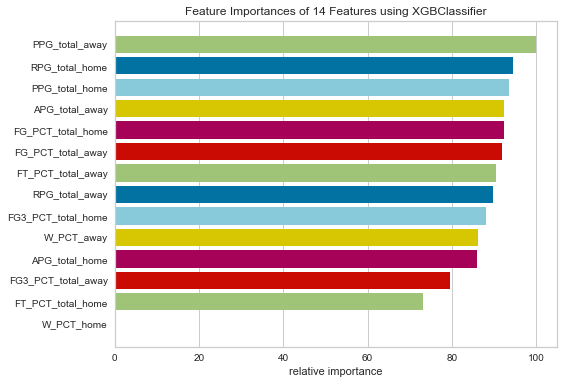

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({'max_depth': 17}): 0.54
              precision    recall  f1-score   support

           0       0.58      0.49      0.53       231
           1       0.52      0.61      0.56       208

    accuracy                           0.54       439
   macro avg       0.55      0.55      0.54       439
weighted avg       0.55      0.54      0.54       439



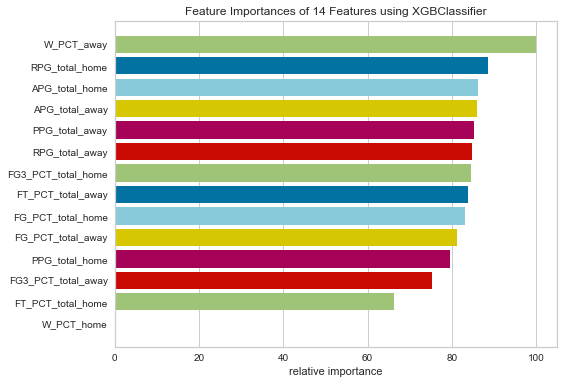

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({'max_depth': 16}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.56      0.59       213
           1       0.62      0.68      0.65       226

    accuracy                           0.62       439
   macro avg       0.62      0.62      0.62       439
weighted avg       0.62      0.62      0.62       439



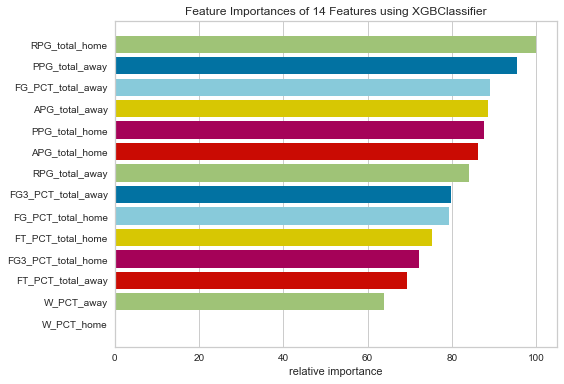

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({'max_depth': 27}): 0.60
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       209
           1       0.61      0.63      0.62       230

    accuracy                           0.60       439
   macro avg       0.60      0.60      0.60       439
weighted avg       0.60      0.60      0.60       439



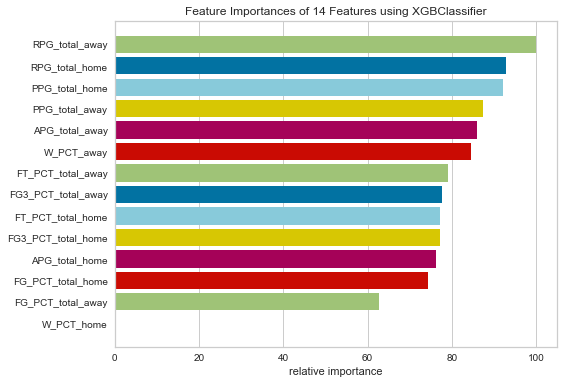

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({'max_depth': 20}): 0.58
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       211
           1       0.60      0.60      0.60       228

    accuracy                           0.58       439
   macro avg       0.58      0.58      0.58       439
weighted avg       0.58      0.58      0.58       439



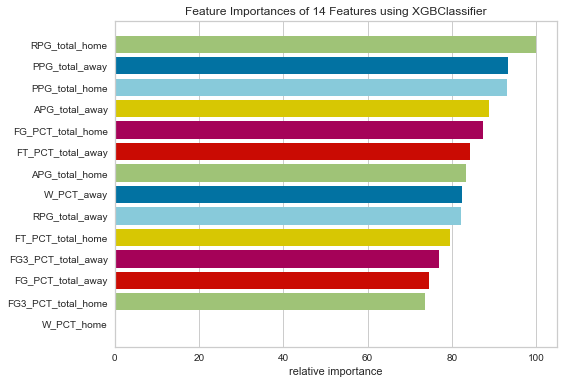

---------------------------------------------
Mean accuracy: 0.5777075999171671
Max accuracy: 0.621867881548975
Min accuracy: 0.5444191343963554
i=20
AST:

Best XGBoost accuracy ({'max_depth': 17}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.80      0.74       388
           1       0.62      0.47      0.54       272

    accuracy                           0.66       660
   macro avg       0.65      0.64      0.64       660
weighted avg       0.66      0.66      0.65       660



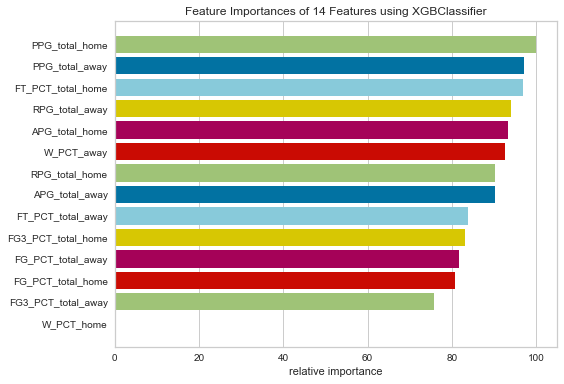

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({'max_depth': 13}): 0.68
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       390
           1       0.64      0.51      0.57       270

    accuracy                           0.68       660
   macro avg       0.67      0.66      0.66       660
weighted avg       0.68      0.68      0.68       660



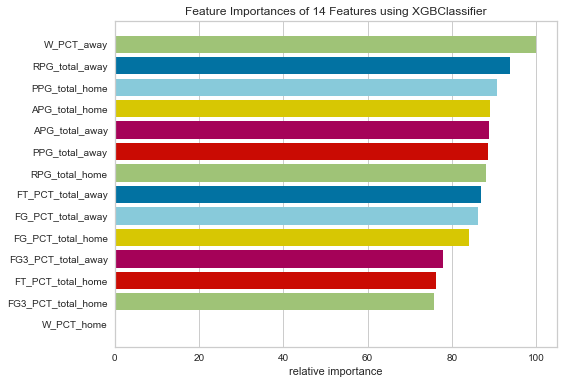

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({'max_depth': 20}): 0.68
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       403
           1       0.61      0.48      0.53       256

    accuracy                           0.68       659
   macro avg       0.66      0.64      0.64       659
weighted avg       0.67      0.68      0.67       659



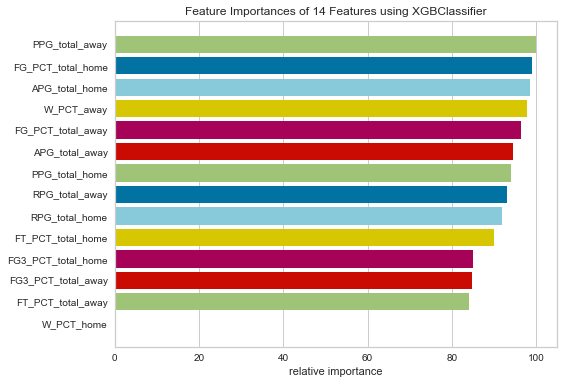

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({'max_depth': 14}): 0.67
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       411
           1       0.57      0.44      0.50       248

    accuracy                           0.67       659
   macro avg       0.64      0.62      0.62       659
weighted avg       0.65      0.67      0.66       659



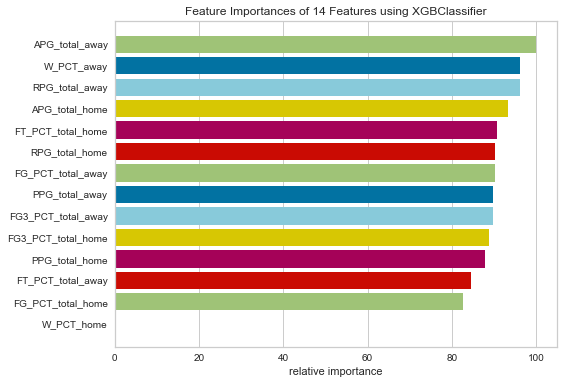

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({'max_depth': 15}): 0.63
              precision    recall  f1-score   support

           0       0.65      0.79      0.72       391
           1       0.56      0.39      0.46       268

    accuracy                           0.63       659
   macro avg       0.61      0.59      0.59       659
weighted avg       0.62      0.63      0.61       659



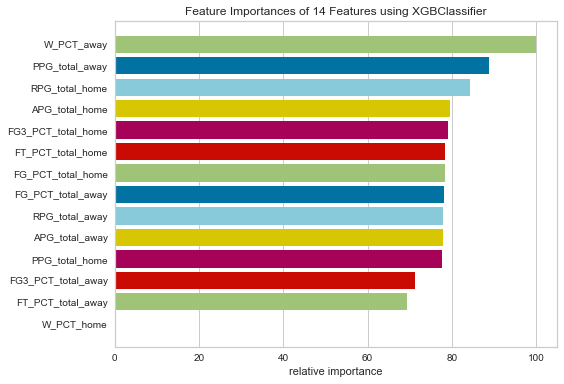

---------------------------------------------
Mean accuracy: 0.6724783878236079
Max accuracy: 0.6833333333333333
Min accuracy: 0.6636363636363637
i=25
REB:

Best XGBoost accuracy ({'max_depth': 26}): 0.63
              precision    recall  f1-score   support

           0       0.68      0.73      0.71       348
           1       0.55      0.49      0.52       230

    accuracy                           0.63       578
   macro avg       0.62      0.61      0.61       578
weighted avg       0.63      0.63      0.63       578



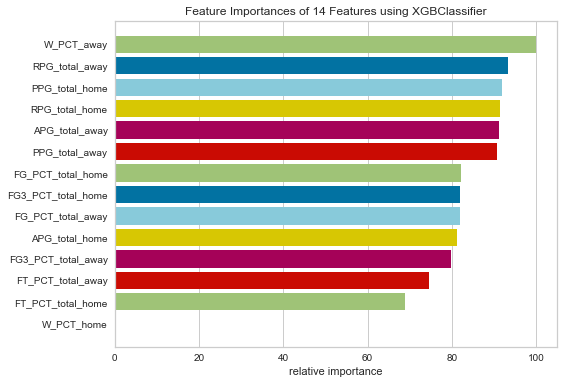

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({'max_depth': 11}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       324
           1       0.64      0.51      0.57       254

    accuracy                           0.66       578
   macro avg       0.66      0.64      0.64       578
weighted avg       0.66      0.66      0.65       578



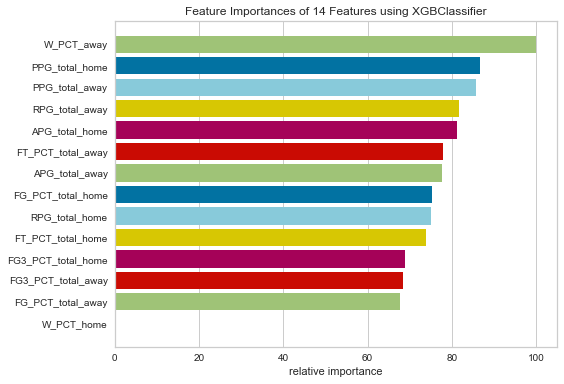

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({'max_depth': 17}): 0.67
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       367
           1       0.56      0.48      0.51       210

    accuracy                           0.67       577
   macro avg       0.64      0.63      0.63       577
weighted avg       0.66      0.67      0.66       577



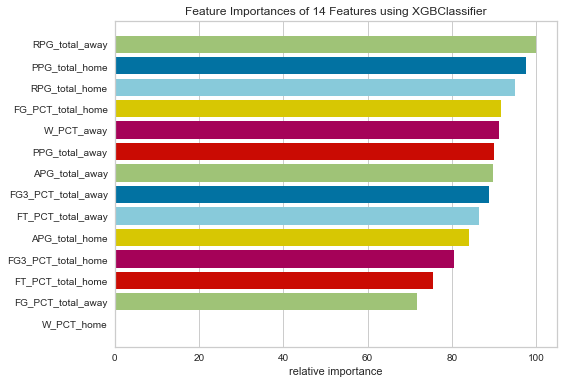

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({'max_depth': 12}): 0.65
              precision    recall  f1-score   support

           0       0.63      0.83      0.72       308
           1       0.69      0.45      0.54       269

    accuracy                           0.65       577
   macro avg       0.66      0.64      0.63       577
weighted avg       0.66      0.65      0.64       577



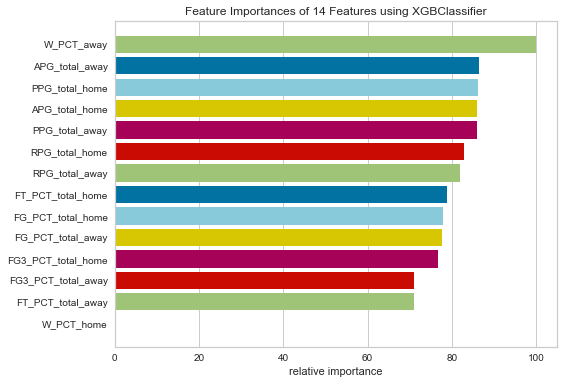

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({'max_depth': 22}): 0.64
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       339
           1       0.57      0.48      0.53       238

    accuracy                           0.64       577
   macro avg       0.62      0.62      0.62       577
weighted avg       0.63      0.64      0.63       577



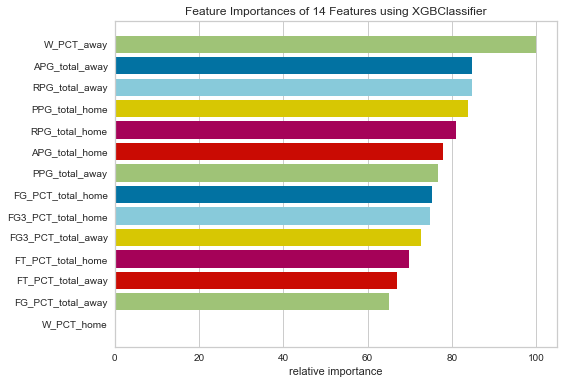

---------------------------------------------
Mean accuracy: 0.6536853909674788
Max accuracy: 0.6707105719237435
Min accuracy: 0.6349480968858131


In [29]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_depth': [*range(3,30)],
})

## Try prune reg_lambda

i=0
WINNER:

Best XGBoost accuracy ({'reg_lambda': 0.25}): 0.69
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       627
           1       0.60      0.44      0.51       346

    accuracy                           0.69       973
   macro avg       0.66      0.64      0.64       973
weighted avg       0.68      0.69      0.68       973



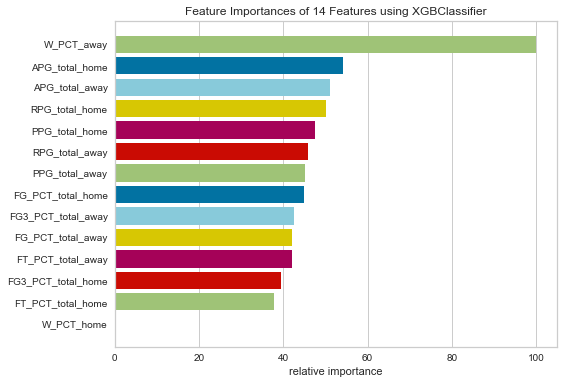

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({'reg_lambda': 1}): 0.70
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       653
           1       0.55      0.49      0.52       320

    accuracy                           0.70       973
   macro avg       0.66      0.65      0.65       973
weighted avg       0.69      0.70      0.70       973



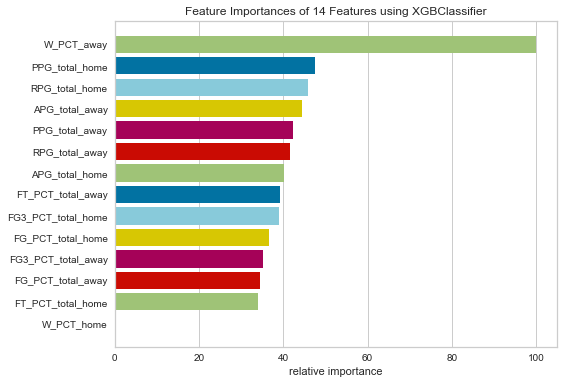

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({'reg_lambda': 0.85}): 0.69
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       596
           1       0.65      0.45      0.53       377

    accuracy                           0.69       973
   macro avg       0.68      0.65      0.65       973
weighted avg       0.69      0.69      0.68       973



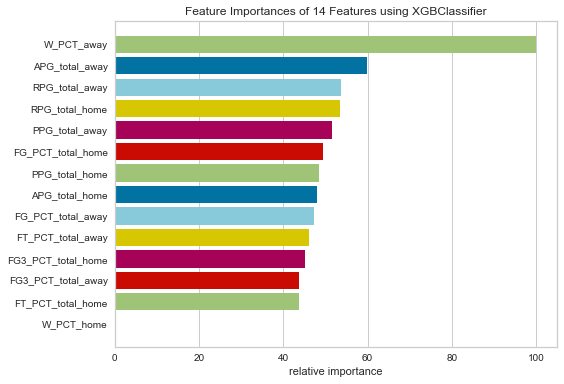

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({'reg_lambda': 1}): 0.72
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       648
           1       0.60      0.46      0.52       325

    accuracy                           0.72       973
   macro avg       0.68      0.65      0.66       973
weighted avg       0.71      0.72      0.71       973



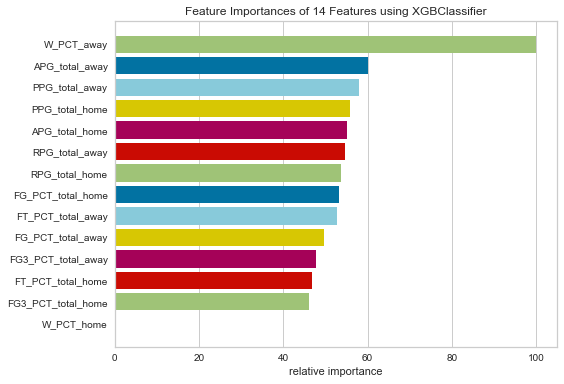

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({'reg_lambda': 0.65}): 0.68
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       606
           1       0.64      0.38      0.48       367

    accuracy                           0.68       973
   macro avg       0.67      0.63      0.63       973
weighted avg       0.67      0.68      0.66       973



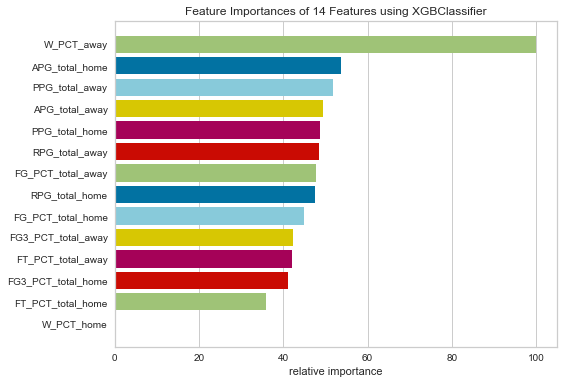

---------------------------------------------
Mean accuracy: 0.7022096608427544
Max accuracy: 0.7183967112024666
Min accuracy: 0.6937307297019527
i=5
FGP:

Best XGBoost accuracy ({'reg_lambda': 0.05}): 0.68
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       423
           1       0.62      0.49      0.55       279

    accuracy                           0.68       702
   macro avg       0.66      0.65      0.65       702
weighted avg       0.67      0.68      0.67       702



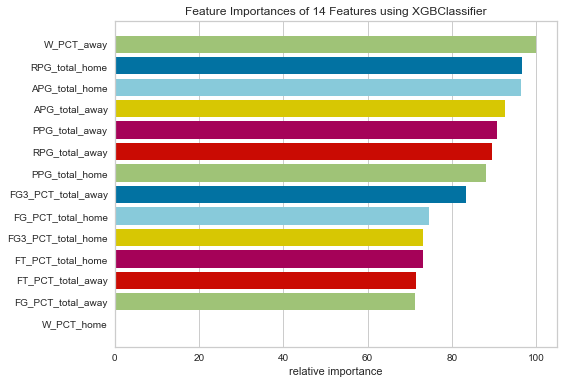

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({'reg_lambda': 0.65}): 0.67
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       420
           1       0.61      0.49      0.54       282

    accuracy                           0.67       702
   macro avg       0.65      0.64      0.64       702
weighted avg       0.66      0.67      0.66       702



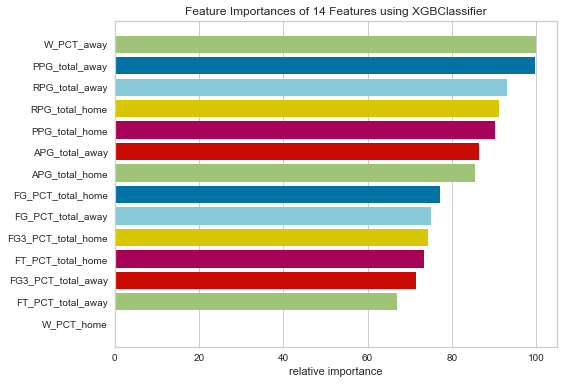

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({'reg_lambda': 0.3}): 0.71
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       424
           1       0.68      0.50      0.58       278

    accuracy                           0.71       702
   macro avg       0.70      0.67      0.68       702
weighted avg       0.70      0.71      0.70       702



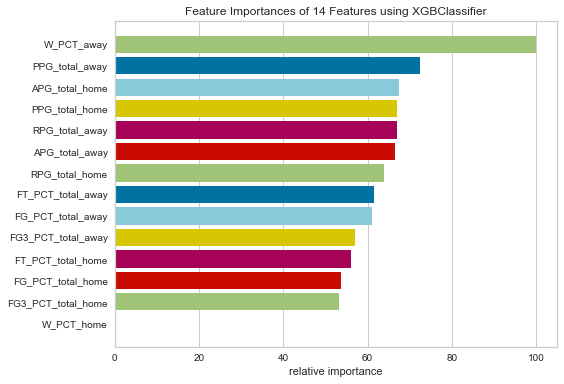

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({'reg_lambda': 0.85}): 0.70
              precision    recall  f1-score   support

           0       0.73      0.83      0.77       438
           1       0.63      0.48      0.54       263

    accuracy                           0.70       701
   macro avg       0.68      0.65      0.66       701
weighted avg       0.69      0.70      0.69       701



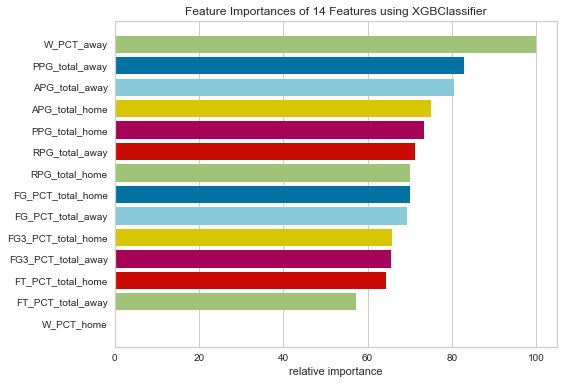

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({'reg_lambda': 0.25}): 0.69
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       418
           1       0.65      0.48      0.55       283

    accuracy                           0.69       701
   macro avg       0.68      0.65      0.66       701
weighted avg       0.68      0.69      0.68       701



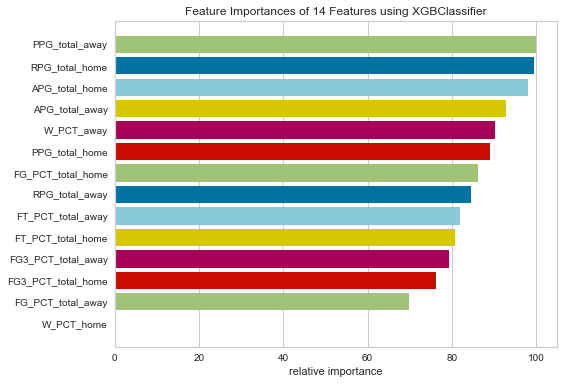

---------------------------------------------
Mean accuracy: 0.6886387374975107
Max accuracy: 0.707977207977208
Min accuracy: 0.6695156695156695
i=10
FG3:

Best XGBoost accuracy ({'reg_lambda': 0.75}): 0.57
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       231
           1       0.55      0.55      0.55       214

    accuracy                           0.57       445
   macro avg       0.57      0.57      0.57       445
weighted avg       0.57      0.57      0.57       445



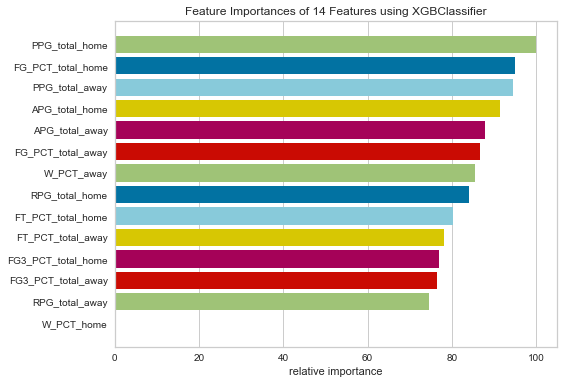

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({'reg_lambda': 0.2}): 0.58
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       240
           1       0.55      0.55      0.55       205

    accuracy                           0.58       445
   macro avg       0.58      0.58      0.58       445
weighted avg       0.58      0.58      0.58       445



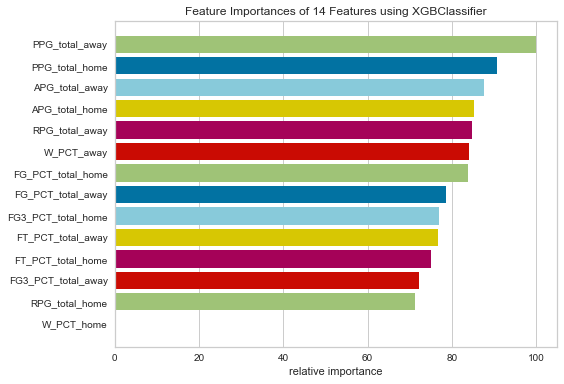

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({'reg_lambda': 0.65}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.63      0.60       226
           1       0.58      0.53      0.55       219

    accuracy                           0.58       445
   macro avg       0.58      0.58      0.58       445
weighted avg       0.58      0.58      0.58       445



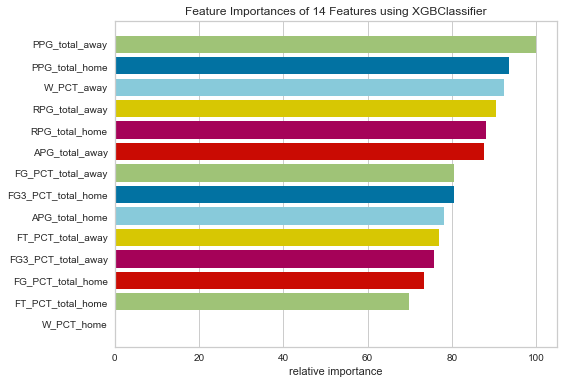

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({'reg_lambda': 0.4}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.67      0.64       227
           1       0.62      0.57      0.60       218

    accuracy                           0.62       445
   macro avg       0.62      0.62      0.62       445
weighted avg       0.62      0.62      0.62       445



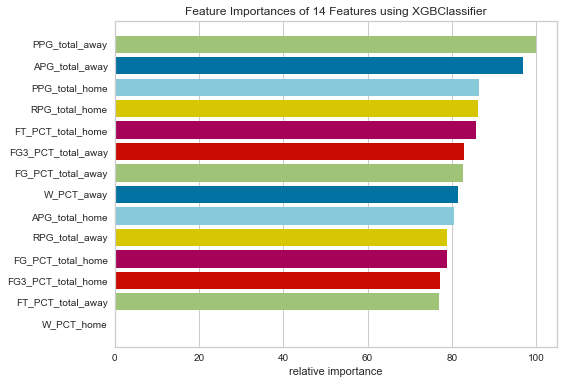

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({'reg_lambda': 0.75}): 0.59
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       230
           1       0.58      0.53      0.56       215

    accuracy                           0.59       445
   macro avg       0.59      0.59      0.59       445
weighted avg       0.59      0.59      0.59       445



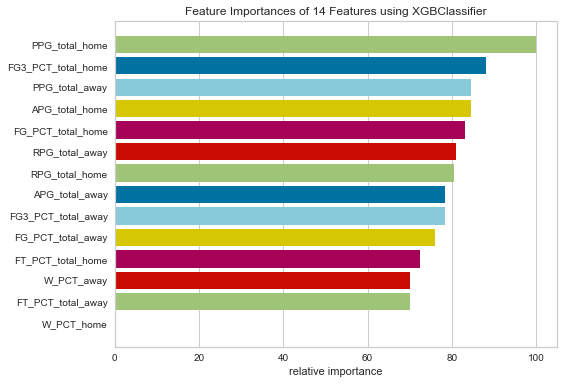

---------------------------------------------
Mean accuracy: 0.5876404494382023
Max accuracy: 0.6202247191011236
Min accuracy: 0.5685393258426966
i=15
FT:

Best XGBoost accuracy ({'reg_lambda': 0.55}): 0.55
              precision    recall  f1-score   support

           0       0.50      0.56      0.53       196
           1       0.61      0.55      0.57       244

    accuracy                           0.55       440
   macro avg       0.55      0.55      0.55       440
weighted avg       0.56      0.55      0.55       440



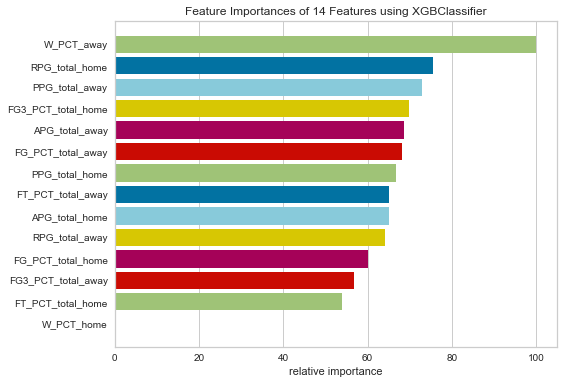

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({'reg_lambda': 0.65}): 0.55
              precision    recall  f1-score   support

           0       0.58      0.48      0.53       231
           1       0.52      0.62      0.56       208

    accuracy                           0.55       439
   macro avg       0.55      0.55      0.55       439
weighted avg       0.55      0.55      0.55       439



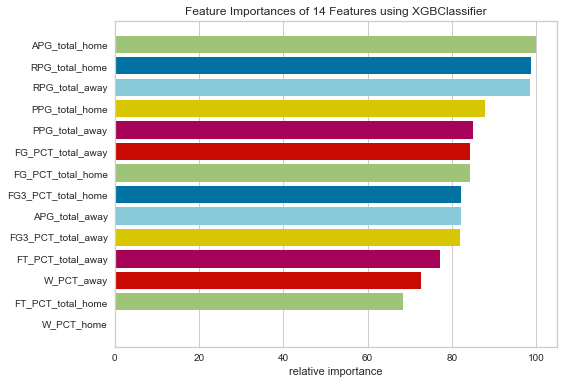

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({'reg_lambda': 0.05}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.52      0.55       213
           1       0.59      0.65      0.62       226

    accuracy                           0.59       439
   macro avg       0.59      0.59      0.58       439
weighted avg       0.59      0.59      0.59       439



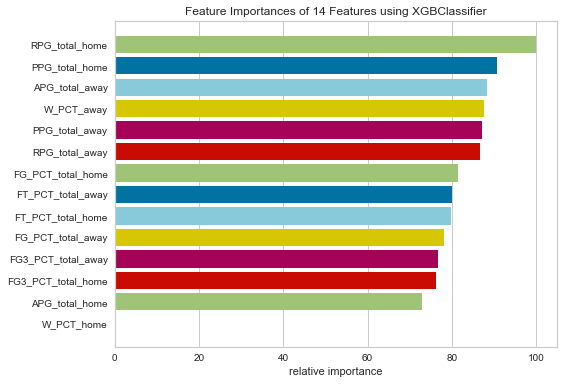

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({'reg_lambda': 0.6}): 0.56
              precision    recall  f1-score   support

           0       0.54      0.53      0.54       209
           1       0.58      0.60      0.59       230

    accuracy                           0.56       439
   macro avg       0.56      0.56      0.56       439
weighted avg       0.56      0.56      0.56       439



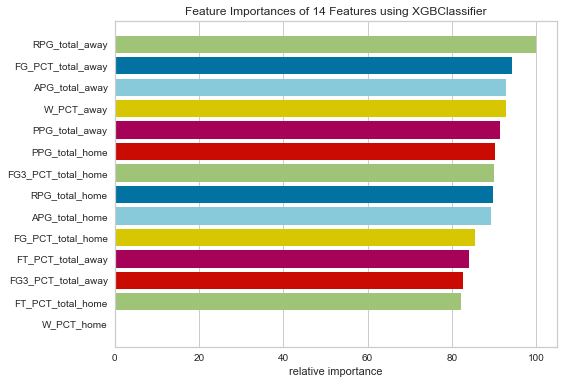

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({'reg_lambda': 0.1}): 0.55
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       211
           1       0.57      0.57      0.57       228

    accuracy                           0.55       439
   macro avg       0.55      0.55      0.55       439
weighted avg       0.55      0.55      0.55       439



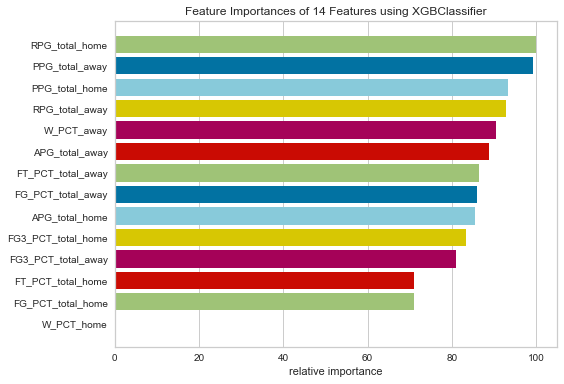

---------------------------------------------
Mean accuracy: 0.5628973389935804
Max accuracy: 0.5876993166287016
Min accuracy: 0.5466970387243736
i=20
AST:

Best XGBoost accuracy ({'reg_lambda': 0.6}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.80      0.74       388
           1       0.62      0.47      0.53       272

    accuracy                           0.66       660
   macro avg       0.65      0.63      0.63       660
weighted avg       0.66      0.66      0.65       660



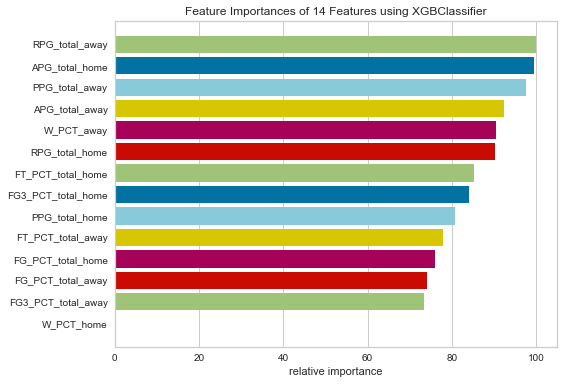

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({'reg_lambda': 0.1}): 0.65
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       390
           1       0.59      0.47      0.52       270

    accuracy                           0.65       660
   macro avg       0.64      0.62      0.62       660
weighted avg       0.64      0.65      0.64       660



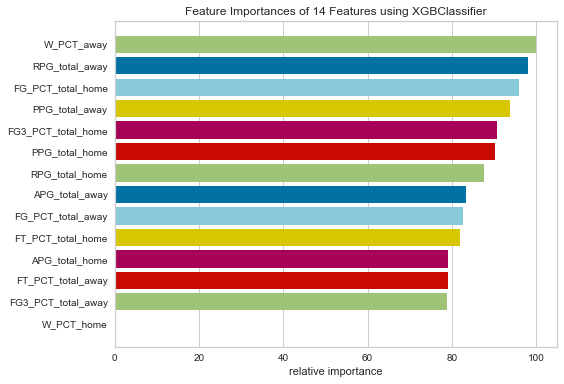

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({'reg_lambda': 0.3}): 0.66
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       403
           1       0.57      0.47      0.52       256

    accuracy                           0.66       659
   macro avg       0.63      0.62      0.63       659
weighted avg       0.65      0.66      0.65       659



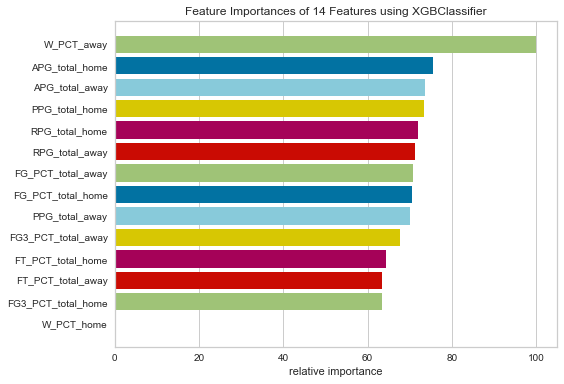

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({'reg_lambda': 0.3}): 0.67
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       411
           1       0.58      0.48      0.52       248

    accuracy                           0.67       659
   macro avg       0.65      0.63      0.64       659
weighted avg       0.66      0.67      0.66       659



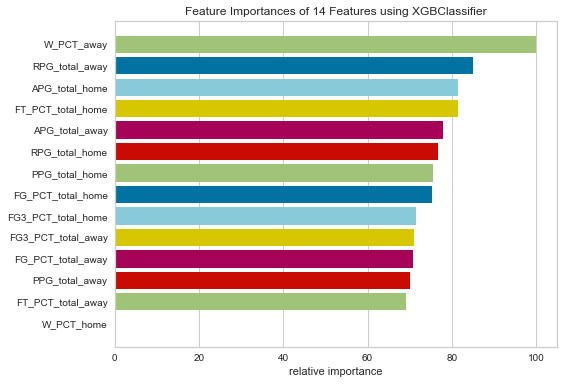

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({'reg_lambda': 1}): 0.62
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       391
           1       0.54      0.40      0.46       268

    accuracy                           0.62       659
   macro avg       0.60      0.58      0.58       659
weighted avg       0.61      0.62      0.61       659



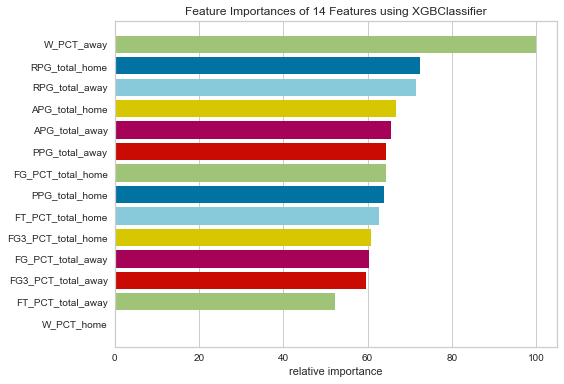

---------------------------------------------
Mean accuracy: 0.6607307904538556
Max accuracy: 0.6722306525037937
Min accuracy: 0.6515151515151515
i=25
REB:

Best XGBoost accuracy ({'reg_lambda': 0.15}): 0.65
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       348
           1       0.56      0.51      0.53       230

    accuracy                           0.65       578
   macro avg       0.63      0.62      0.62       578
weighted avg       0.64      0.65      0.64       578



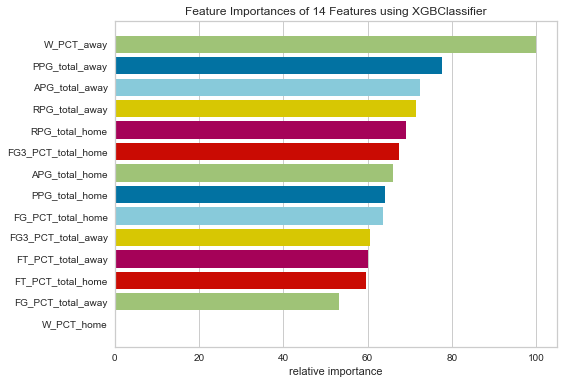

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({'reg_lambda': 0.55}): 0.63
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       324
           1       0.61      0.47      0.53       254

    accuracy                           0.63       578
   macro avg       0.63      0.62      0.61       578
weighted avg       0.63      0.63      0.62       578



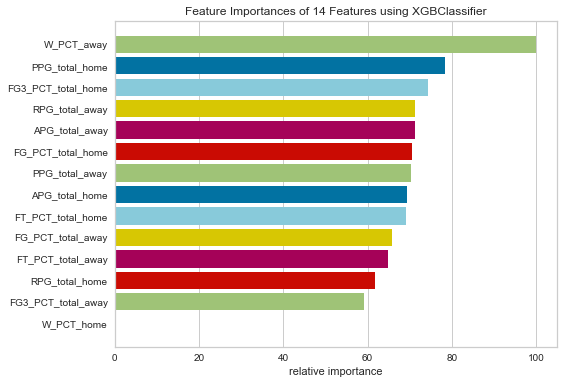

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({'reg_lambda': 0.15}): 0.65
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       367
           1       0.52      0.50      0.51       210

    accuracy                           0.65       577
   macro avg       0.62      0.62      0.62       577
weighted avg       0.65      0.65      0.65       577



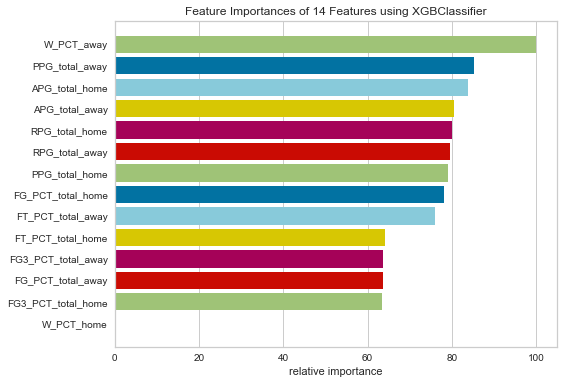

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({'reg_lambda': 0.25}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.80      0.70       308
           1       0.65      0.43      0.52       269

    accuracy                           0.63       577
   macro avg       0.63      0.61      0.61       577
weighted avg       0.63      0.63      0.61       577



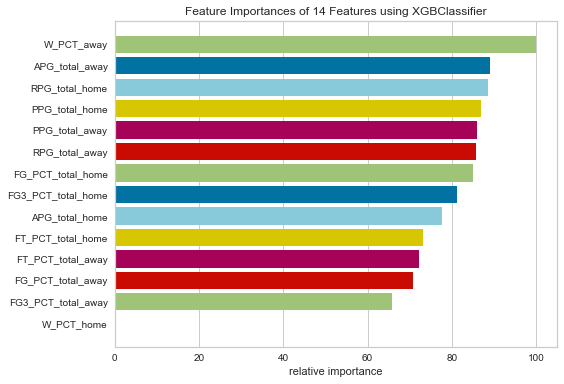

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({'reg_lambda': 0.3}): 0.63
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       339
           1       0.56      0.46      0.50       238

    accuracy                           0.63       577
   macro avg       0.61      0.60      0.60       577
weighted avg       0.62      0.63      0.62       577



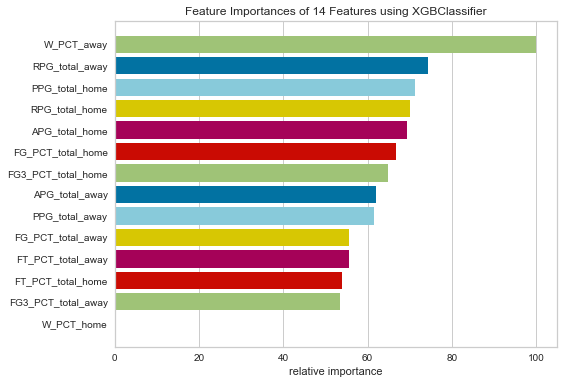

---------------------------------------------
Mean accuracy: 0.6393940438852674
Max accuracy: 0.6516464471403813
Min accuracy: 0.6273830155979203


In [30]:
# L2 regularization term on weights. Increasing this value will make model more conservative.

print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'reg_lambda': [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
})

## Try prune learning rate

i=0
WINNER:

Best XGBoost accuracy ({'learning_rate': 0.5}): 0.71
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       627
           1       0.63      0.46      0.53       346

    accuracy                           0.71       973
   macro avg       0.69      0.65      0.66       973
weighted avg       0.70      0.71      0.70       973



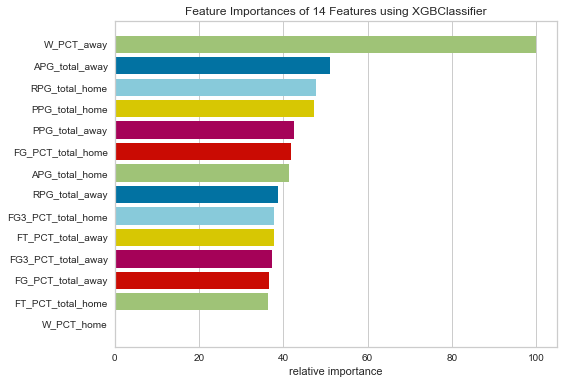

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({'learning_rate': 0.65}): 0.71
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       653
           1       0.57      0.48      0.52       320

    accuracy                           0.71       973
   macro avg       0.67      0.65      0.66       973
weighted avg       0.70      0.71      0.70       973



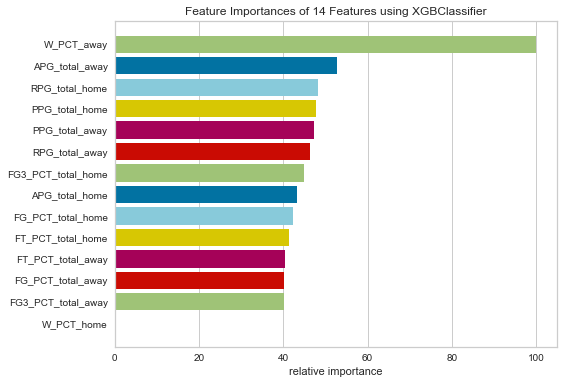

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({'learning_rate': 0.8}): 0.69
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       596
           1       0.62      0.47      0.54       377

    accuracy                           0.69       973
   macro avg       0.67      0.65      0.65       973
weighted avg       0.68      0.69      0.68       973



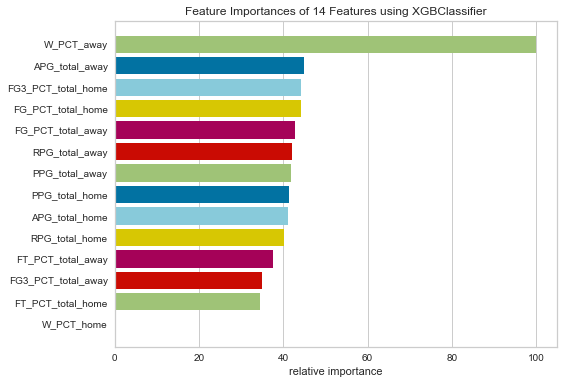

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({'learning_rate': 0.55}): 0.72
              precision    recall  f1-score   support

           0       0.77      0.83      0.79       648
           1       0.59      0.50      0.54       325

    accuracy                           0.72       973
   macro avg       0.68      0.66      0.67       973
weighted avg       0.71      0.72      0.71       973



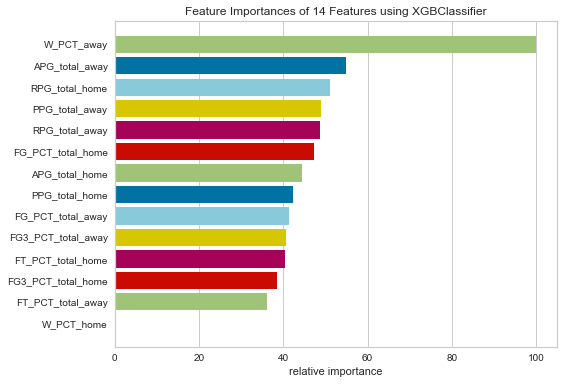

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({'learning_rate': 0.6}): 0.70
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       606
           1       0.64      0.43      0.52       367

    accuracy                           0.70       973
   macro avg       0.68      0.64      0.65       973
weighted avg       0.69      0.70      0.68       973



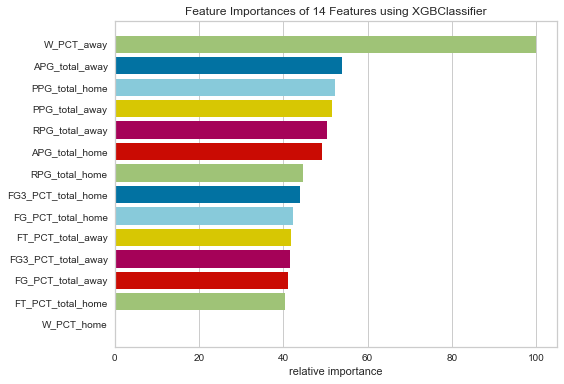

---------------------------------------------
Mean accuracy: 0.7055498458376155
Max accuracy: 0.7153134635149023
Min accuracy: 0.6855087358684481
i=5
FGP:

Best XGBoost accuracy ({'learning_rate': 0.35}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       423
           1       0.61      0.46      0.52       279

    accuracy                           0.67       702
   macro avg       0.65      0.63      0.63       702
weighted avg       0.66      0.67      0.66       702



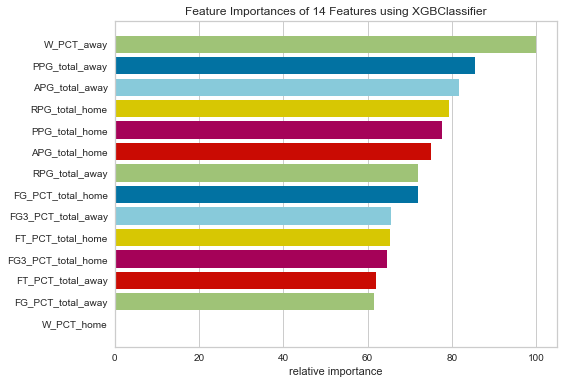

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({'learning_rate': 0.55}): 0.65
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       420
           1       0.58      0.49      0.53       282

    accuracy                           0.65       702
   macro avg       0.64      0.63      0.63       702
weighted avg       0.65      0.65      0.65       702



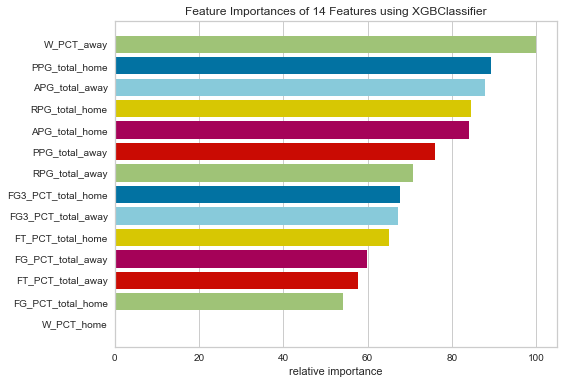

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({'learning_rate': 0.25}): 0.69
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       424
           1       0.65      0.48      0.55       278

    accuracy                           0.69       702
   macro avg       0.68      0.65      0.66       702
weighted avg       0.68      0.69      0.68       702



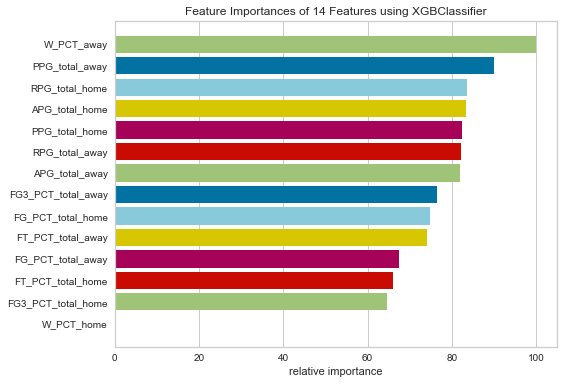

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({'learning_rate': 0.6}): 0.69
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       438
           1       0.61      0.48      0.54       263

    accuracy                           0.69       701
   macro avg       0.67      0.65      0.65       701
weighted avg       0.68      0.69      0.68       701



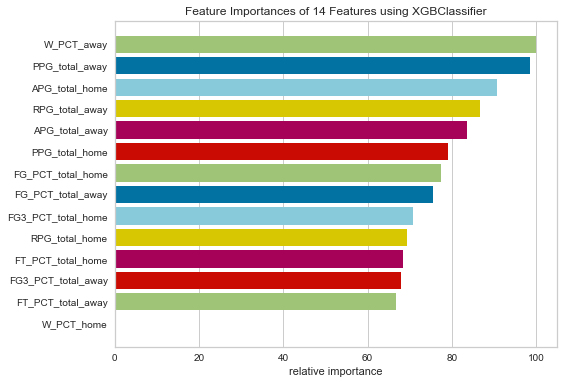

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({'learning_rate': 0.85}): 0.68
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       418
           1       0.64      0.47      0.55       283

    accuracy                           0.68       701
   macro avg       0.67      0.65      0.65       701
weighted avg       0.68      0.68      0.67       701



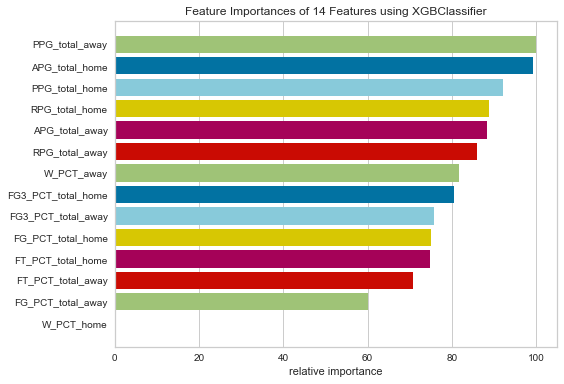

---------------------------------------------
Mean accuracy: 0.6758161925779614
Max accuracy: 0.6918687589158345
Min accuracy: 0.6538461538461539
i=10
FG3:

Best XGBoost accuracy ({'learning_rate': 0.35}): 0.61
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       231
           1       0.60      0.58      0.59       214

    accuracy                           0.61       445
   macro avg       0.61      0.61      0.61       445
weighted avg       0.61      0.61      0.61       445



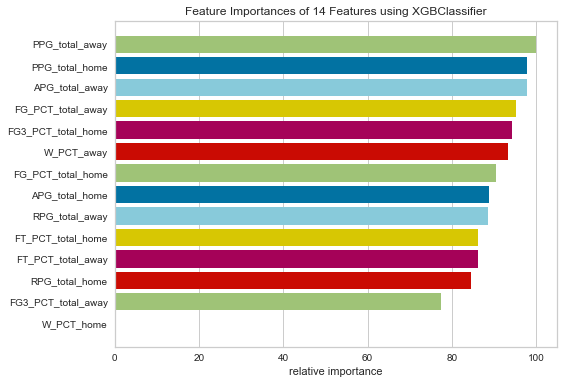

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({'learning_rate': 0.45}): 0.56
              precision    recall  f1-score   support

           0       0.59      0.62      0.61       240
           1       0.53      0.49      0.51       205

    accuracy                           0.56       445
   macro avg       0.56      0.56      0.56       445
weighted avg       0.56      0.56      0.56       445



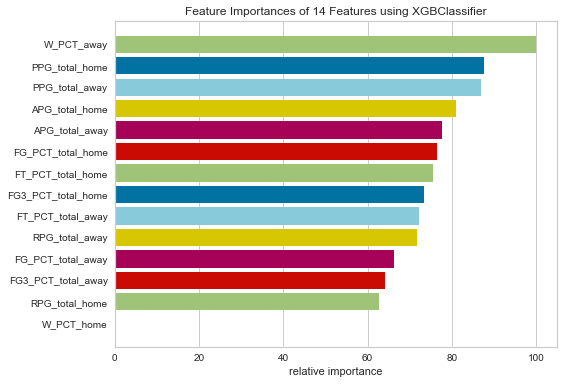

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({'learning_rate': 0.2}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       226
           1       0.59      0.53      0.56       219

    accuracy                           0.59       445
   macro avg       0.59      0.59      0.59       445
weighted avg       0.59      0.59      0.59       445



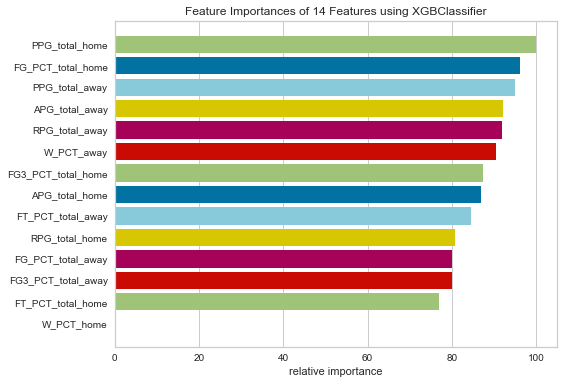

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({'learning_rate': 0.55}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.69      0.65       227
           1       0.64      0.56      0.60       218

    accuracy                           0.63       445
   macro avg       0.63      0.63      0.62       445
weighted avg       0.63      0.63      0.63       445



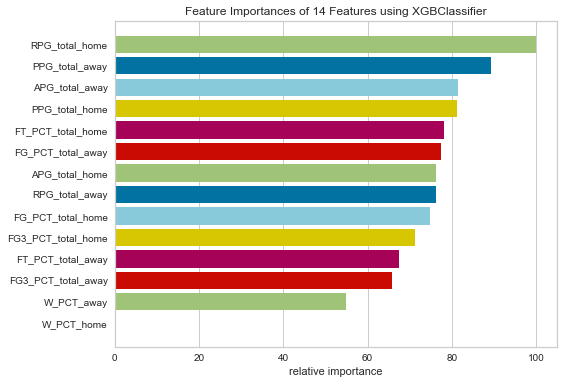

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({'learning_rate': 0.25}): 0.60
              precision    recall  f1-score   support

           0       0.61      0.62      0.61       230
           1       0.58      0.57      0.58       215

    accuracy                           0.60       445
   macro avg       0.59      0.59      0.59       445
weighted avg       0.60      0.60      0.60       445



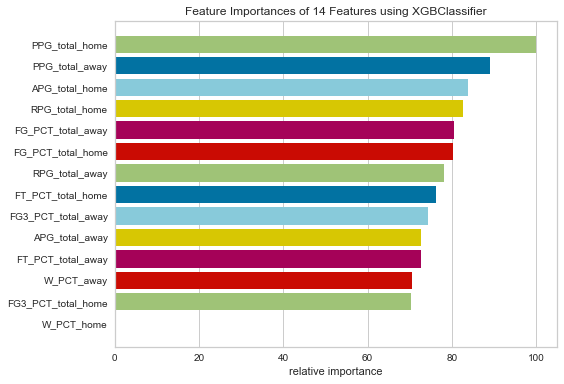

---------------------------------------------
Mean accuracy: 0.598314606741573
Max accuracy: 0.6269662921348315
Min accuracy: 0.5617977528089888
i=15
FT:

Best XGBoost accuracy ({'learning_rate': 0.1}): 0.57
              precision    recall  f1-score   support

           0       0.52      0.57      0.54       196
           1       0.62      0.57      0.60       244

    accuracy                           0.57       440
   macro avg       0.57      0.57      0.57       440
weighted avg       0.58      0.57      0.57       440



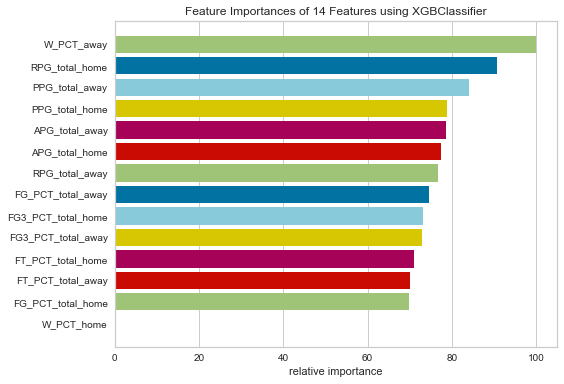

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({'learning_rate': 0.4}): 0.62
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       231
           1       0.59      0.66      0.62       208

    accuracy                           0.62       439
   macro avg       0.62      0.62      0.62       439
weighted avg       0.62      0.62      0.62       439



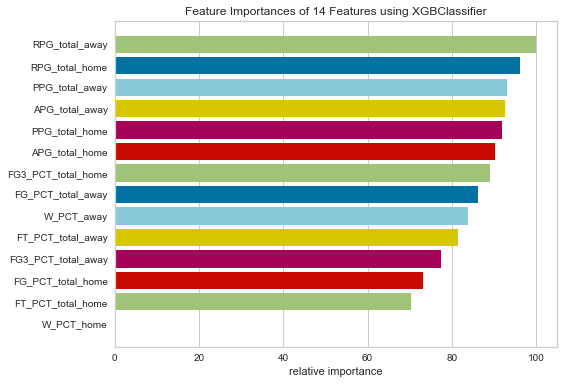

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({'learning_rate': 0.45}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.54      0.56       213
           1       0.59      0.64      0.62       226

    accuracy                           0.59       439
   macro avg       0.59      0.59      0.59       439
weighted avg       0.59      0.59      0.59       439



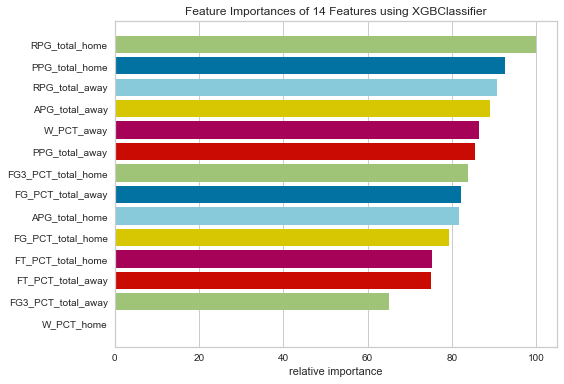

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({'learning_rate': 0.45}): 0.58
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       209
           1       0.60      0.60      0.60       230

    accuracy                           0.58       439
   macro avg       0.58      0.58      0.58       439
weighted avg       0.58      0.58      0.58       439



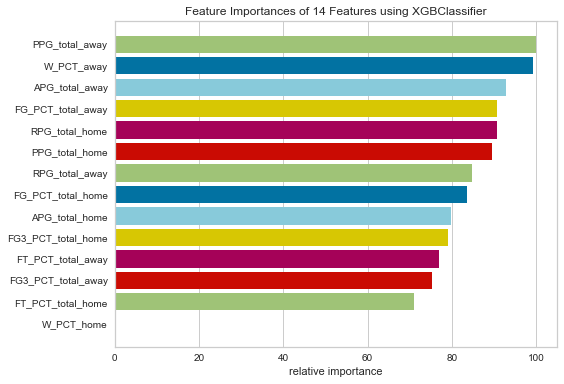

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({'learning_rate': 0.5}): 0.57
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       211
           1       0.59      0.56      0.57       228

    accuracy                           0.57       439
   macro avg       0.57      0.57      0.57       439
weighted avg       0.57      0.57      0.57       439



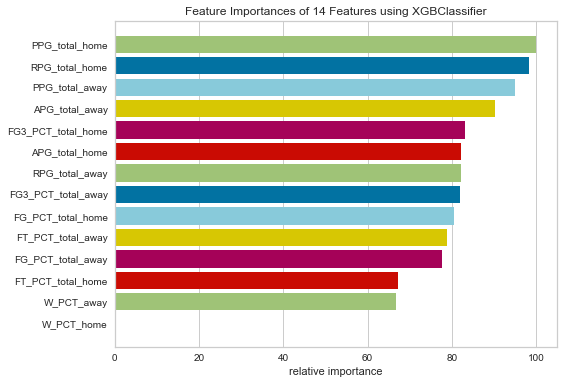

---------------------------------------------
Mean accuracy: 0.5907913129012218
Max accuracy: 0.6195899772209568
Min accuracy: 0.5704545454545454
i=20
AST:

Best XGBoost accuracy ({'learning_rate': 0.35}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       388
           1       0.63      0.50      0.56       272

    accuracy                           0.67       660
   macro avg       0.66      0.65      0.65       660
weighted avg       0.67      0.67      0.67       660



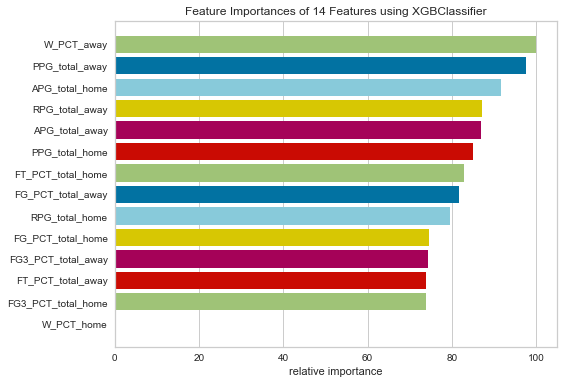

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({'learning_rate': 0.15}): 0.65
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       390
           1       0.59      0.43      0.50       270

    accuracy                           0.65       660
   macro avg       0.63      0.61      0.61       660
weighted avg       0.64      0.65      0.63       660



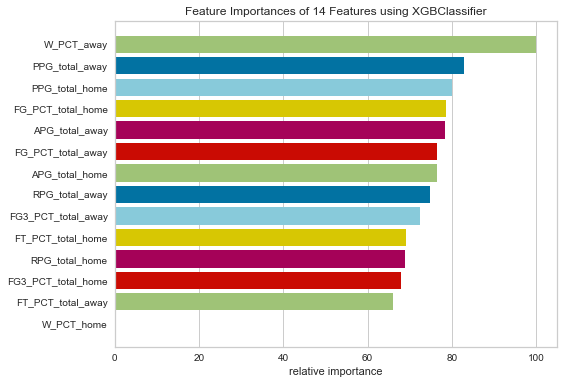

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({'learning_rate': 0.65}): 0.64
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       403
           1       0.55      0.47      0.50       256

    accuracy                           0.64       659
   macro avg       0.62      0.61      0.61       659
weighted avg       0.63      0.64      0.64       659



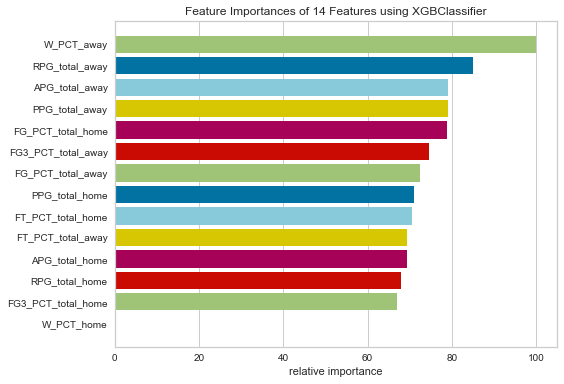

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({'learning_rate': 0.45}): 0.66
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       411
           1       0.56      0.49      0.52       248

    accuracy                           0.66       659
   macro avg       0.64      0.63      0.63       659
weighted avg       0.66      0.66      0.66       659



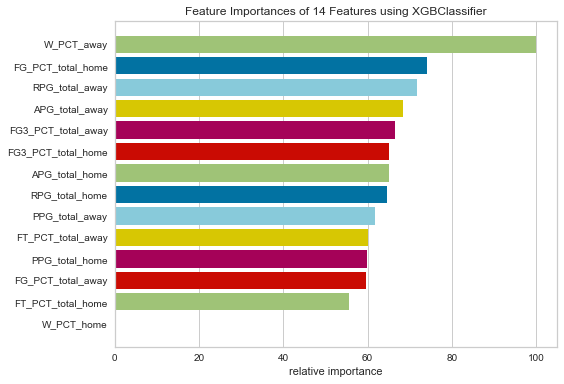

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({'learning_rate': 0.3}): 0.62
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       391
           1       0.54      0.40      0.46       268

    accuracy                           0.62       659
   macro avg       0.60      0.58      0.58       659
weighted avg       0.61      0.62      0.61       659



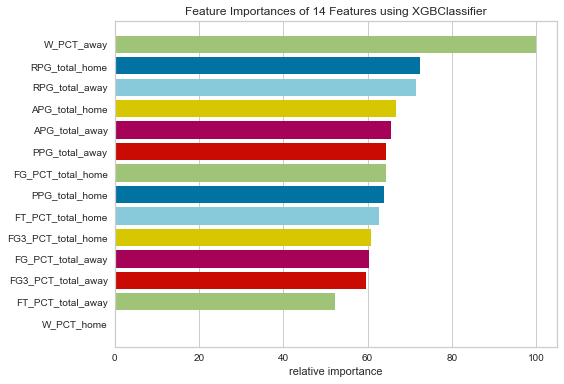

---------------------------------------------
Mean accuracy: 0.6569342897870971
Max accuracy: 0.6742424242424242
Min accuracy: 0.6418816388467374
i=25
REB:

Best XGBoost accuracy ({'learning_rate': 0.9}): 0.63
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       348
           1       0.54      0.51      0.52       230

    accuracy                           0.63       578
   macro avg       0.61      0.61      0.61       578
weighted avg       0.63      0.63      0.63       578



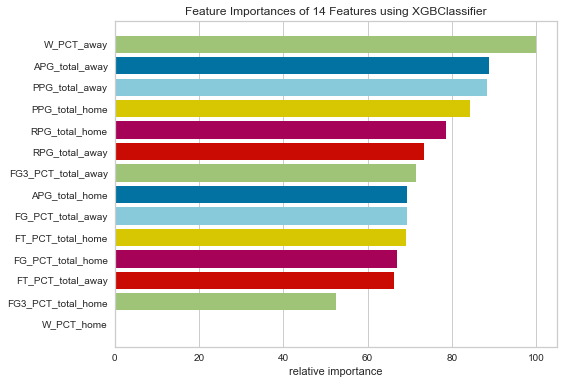

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({'learning_rate': 0.05}): 0.62
              precision    recall  f1-score   support

           0       0.63      0.81      0.70       324
           1       0.61      0.39      0.47       254

    accuracy                           0.62       578
   macro avg       0.62      0.60      0.59       578
weighted avg       0.62      0.62      0.60       578



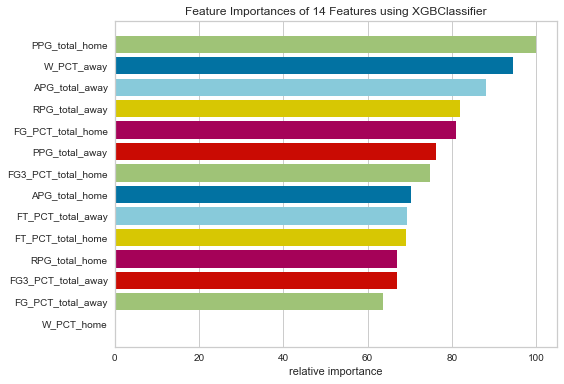

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({'learning_rate': 0.3}): 0.66
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       367
           1       0.54      0.50      0.52       210

    accuracy                           0.66       577
   macro avg       0.63      0.63      0.63       577
weighted avg       0.66      0.66      0.66       577



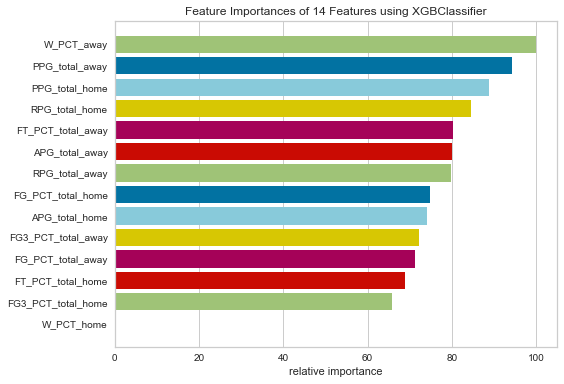

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({'learning_rate': 0.3}): 0.61
              precision    recall  f1-score   support

           0       0.60      0.79      0.68       308
           1       0.63      0.41      0.50       269

    accuracy                           0.61       577
   macro avg       0.62      0.60      0.59       577
weighted avg       0.62      0.61      0.60       577



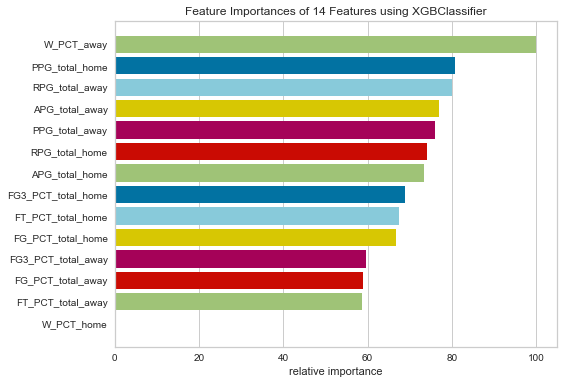

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({'learning_rate': 0.25}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.77      0.73       339
           1       0.60      0.49      0.54       238

    accuracy                           0.66       577
   macro avg       0.64      0.63      0.63       577
weighted avg       0.65      0.66      0.65       577



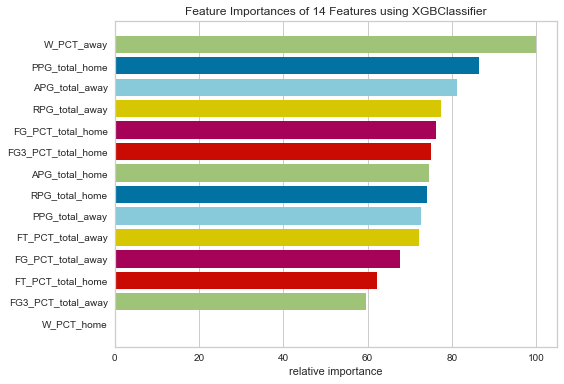

---------------------------------------------
Mean accuracy: 0.6320388538736934
Max accuracy: 0.6620450606585788
Min accuracy: 0.6117850953206239


In [31]:
# Step size shrinkage used in update to prevent overfitting.  
# After each boosting step, we can directly get the weights of new features. 
# learnig rate shrinks the feature weights to make the boosting process more conservative.

print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'learning_rate' : [0.0,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
})

## Try prune gamma

i=0
WINNER:

Best XGBoost accuracy ({'gamma': 1}): 0.70
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       627
           1       0.61      0.42      0.50       346

    accuracy                           0.70       973
   macro avg       0.67      0.64      0.64       973
weighted avg       0.69      0.70      0.68       973



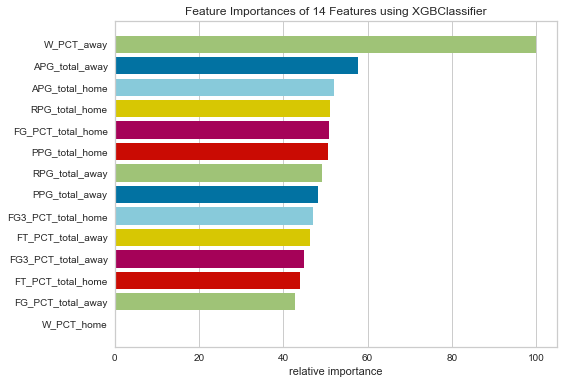

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({'gamma': 2}): 0.72
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       653
           1       0.61      0.43      0.50       320

    accuracy                           0.72       973
   macro avg       0.68      0.65      0.66       973
weighted avg       0.71      0.72      0.71       973



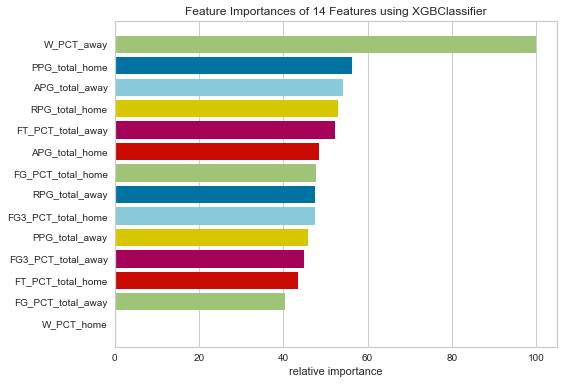

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({'gamma': 0}): 0.68
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       596
           1       0.64      0.41      0.50       377

    accuracy                           0.68       973
   macro avg       0.67      0.63      0.63       973
weighted avg       0.67      0.68      0.66       973



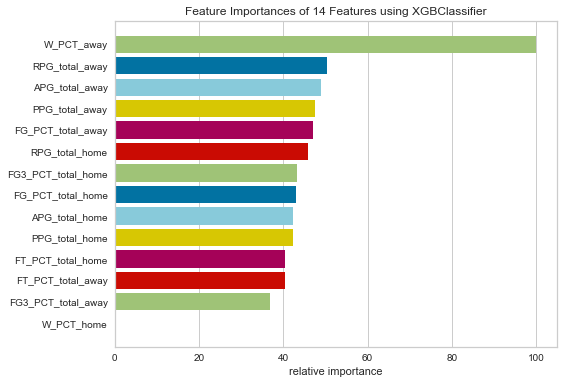

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({'gamma': 1}): 0.72
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       648
           1       0.60      0.46      0.52       325

    accuracy                           0.72       973
   macro avg       0.68      0.65      0.66       973
weighted avg       0.71      0.72      0.71       973



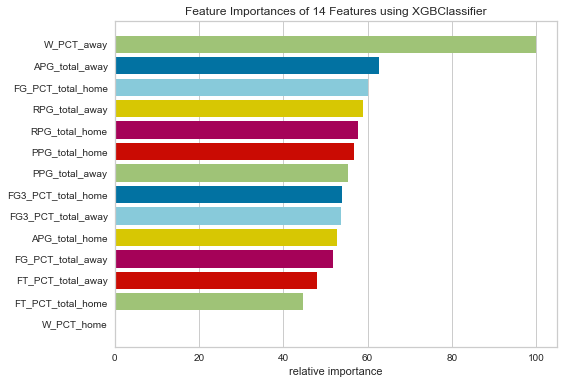

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({'gamma': 0}): 0.69
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       606
           1       0.64      0.39      0.48       367

    accuracy                           0.69       973
   macro avg       0.67      0.63      0.63       973
weighted avg       0.68      0.69      0.66       973



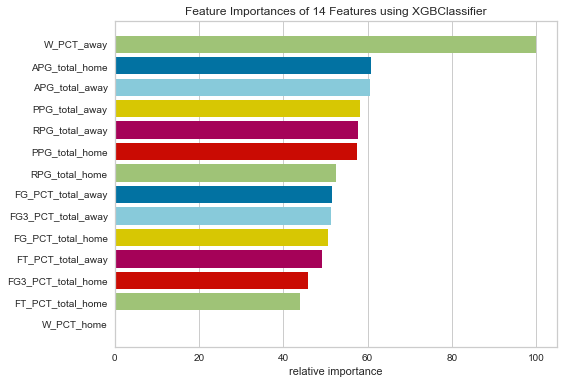

---------------------------------------------
Mean accuracy: 0.7050359712230215
Max accuracy: 0.7214799588900308
Min accuracy: 0.6813977389516958
i=5
FGP:

Best XGBoost accuracy ({'gamma': 1}): 0.64
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       423
           1       0.56      0.43      0.48       279

    accuracy                           0.64       702
   macro avg       0.62      0.60      0.60       702
weighted avg       0.63      0.64      0.63       702



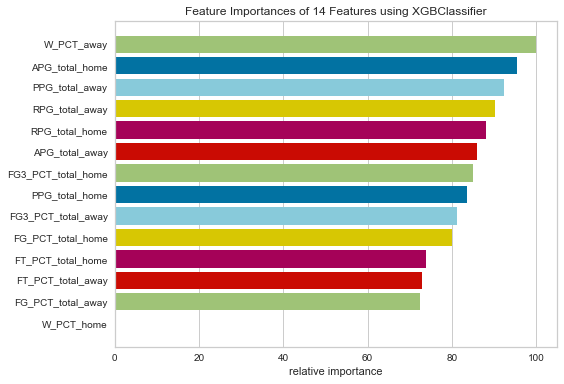

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({'gamma': 0}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       420
           1       0.63      0.44      0.52       282

    accuracy                           0.67       702
   macro avg       0.66      0.63      0.64       702
weighted avg       0.67      0.67      0.66       702



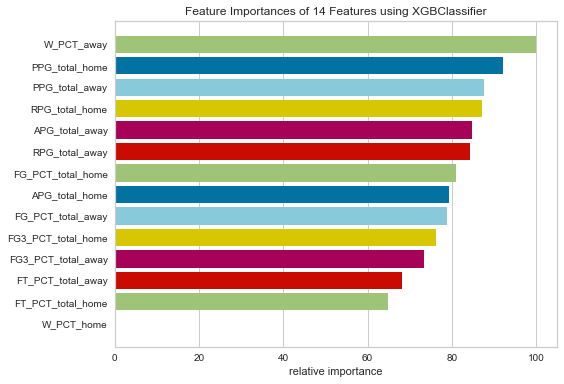

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({'gamma': 1}): 0.70
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       424
           1       0.66      0.47      0.55       278

    accuracy                           0.70       702
   macro avg       0.68      0.66      0.66       702
weighted avg       0.69      0.70      0.68       702



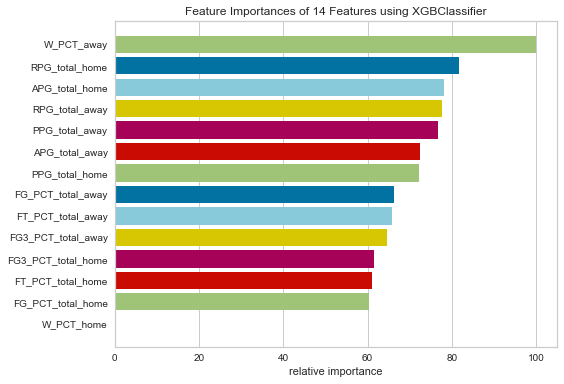

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({'gamma': 0}): 0.66
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       438
           1       0.57      0.40      0.47       263

    accuracy                           0.66       701
   macro avg       0.63      0.61      0.61       701
weighted avg       0.65      0.66      0.64       701



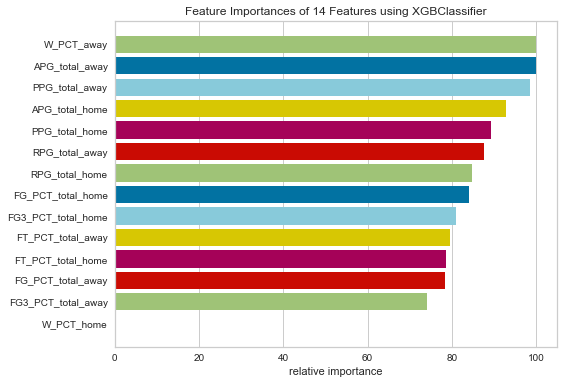

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({'gamma': 21}): 0.60
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       418
           1       0.67      0.01      0.01       283

    accuracy                           0.60       701
   macro avg       0.63      0.50      0.38       701
weighted avg       0.63      0.60      0.45       701



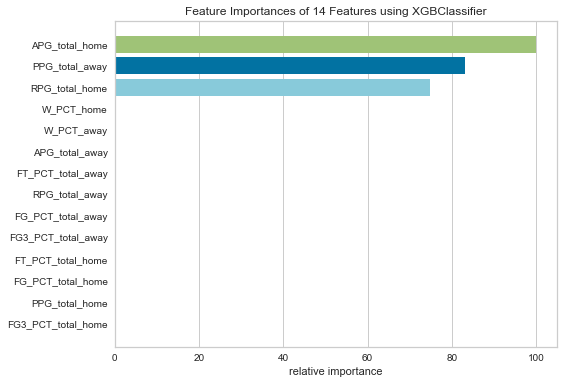

---------------------------------------------
Mean accuracy: 0.6669018821301276
Max accuracy: 0.6951566951566952
Min accuracy: 0.6396011396011396
i=10
FG3:

Best XGBoost accuracy ({'gamma': 3}): 0.55
              precision    recall  f1-score   support

           0       0.56      0.59      0.57       231
           1       0.53      0.50      0.51       214

    accuracy                           0.55       445
   macro avg       0.54      0.54      0.54       445
weighted avg       0.55      0.55      0.55       445



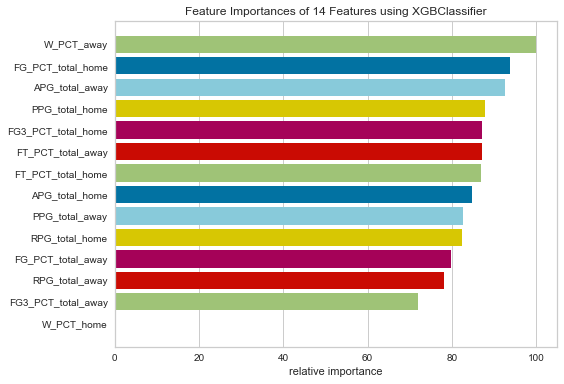

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({'gamma': 10}): 0.56
              precision    recall  f1-score   support

           0       0.57      0.78      0.65       240
           1       0.54      0.31      0.39       205

    accuracy                           0.56       445
   macro avg       0.55      0.54      0.52       445
weighted avg       0.55      0.56      0.53       445



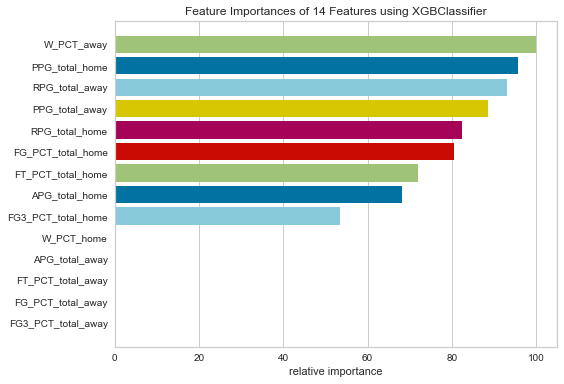

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({'gamma': 5}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.67      0.62       226
           1       0.59      0.49      0.53       219

    accuracy                           0.58       445
   macro avg       0.58      0.58      0.58       445
weighted avg       0.58      0.58      0.58       445



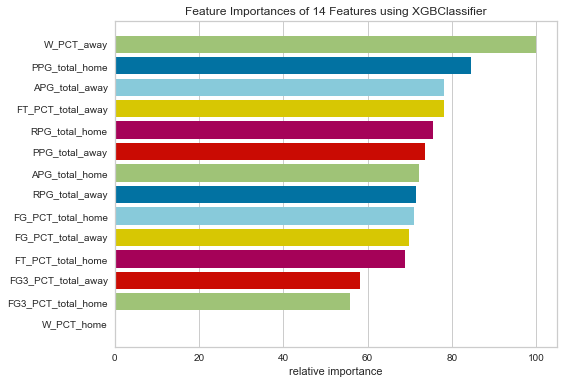

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({'gamma': 0}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.66      0.63       227
           1       0.61      0.56      0.58       218

    accuracy                           0.61       445
   macro avg       0.61      0.61      0.61       445
weighted avg       0.61      0.61      0.61       445



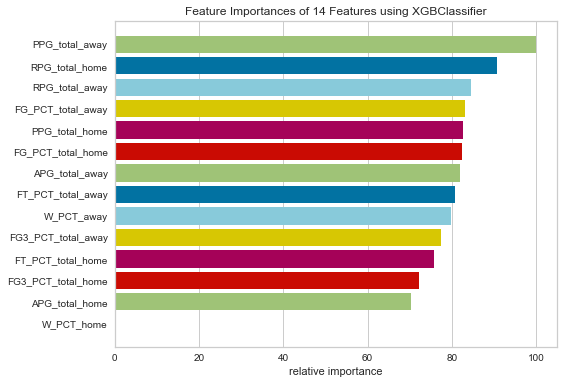

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({'gamma': 1}): 0.56
              precision    recall  f1-score   support

           0       0.57      0.63      0.60       230
           1       0.55      0.48      0.52       215

    accuracy                           0.56       445
   macro avg       0.56      0.56      0.56       445
weighted avg       0.56      0.56      0.56       445



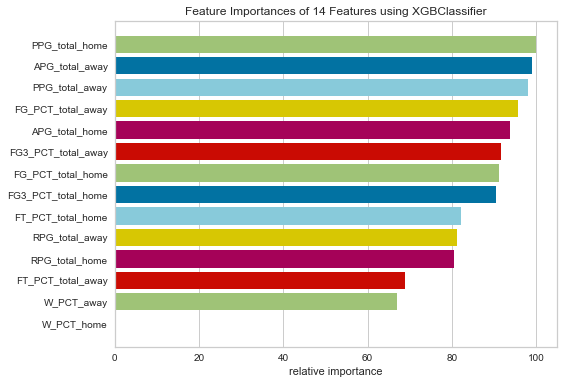

---------------------------------------------
Mean accuracy: 0.5735955056179776
Max accuracy: 0.6089887640449438
Min accuracy: 0.5460674157303371
i=15
FT:

Best XGBoost accuracy ({'gamma': 5}): 0.52
              precision    recall  f1-score   support

           0       0.47      0.49      0.48       196
           1       0.57      0.55      0.56       244

    accuracy                           0.52       440
   macro avg       0.52      0.52      0.52       440
weighted avg       0.53      0.52      0.52       440



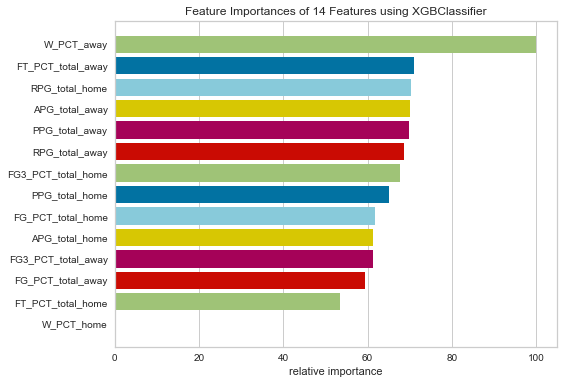

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({'gamma': 5}): 0.54
              precision    recall  f1-score   support

           0       0.59      0.46      0.51       231
           1       0.52      0.64      0.57       208

    accuracy                           0.54       439
   macro avg       0.55      0.55      0.54       439
weighted avg       0.55      0.54      0.54       439



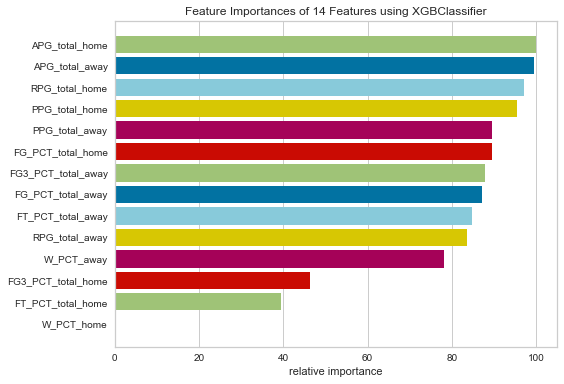

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({'gamma': 2}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.50      0.53       213
           1       0.57      0.62      0.60       226

    accuracy                           0.56       439
   macro avg       0.56      0.56      0.56       439
weighted avg       0.56      0.56      0.56       439



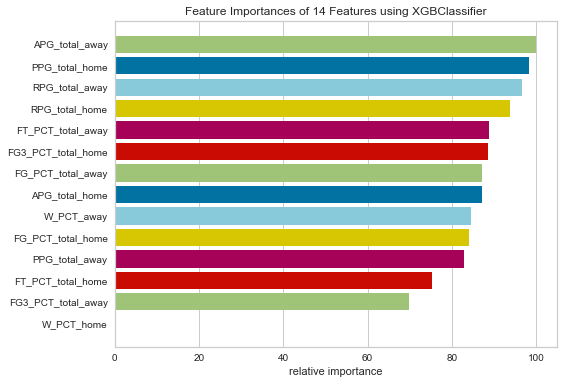

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({'gamma': 0}): 0.61
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       209
           1       0.63      0.61      0.62       230

    accuracy                           0.61       439
   macro avg       0.61      0.61      0.61       439
weighted avg       0.61      0.61      0.61       439



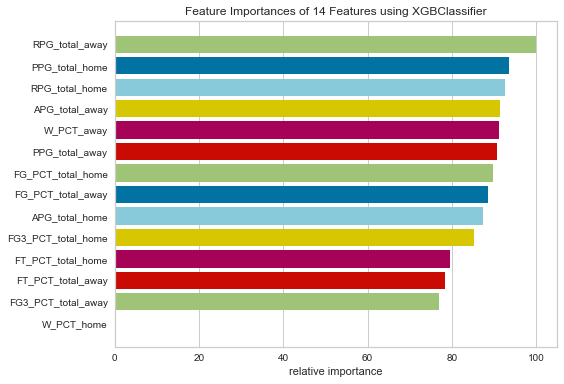

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({'gamma': 5}): 0.55
              precision    recall  f1-score   support

           0       0.54      0.49      0.51       211
           1       0.56      0.61      0.59       228

    accuracy                           0.55       439
   macro avg       0.55      0.55      0.55       439
weighted avg       0.55      0.55      0.55       439



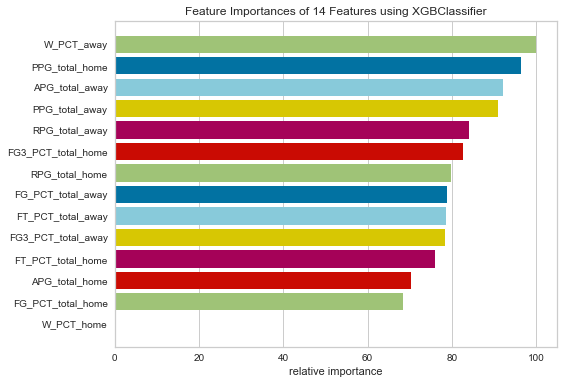

---------------------------------------------
Mean accuracy: 0.5600667840132533
Max accuracy: 0.6082004555808656
Min accuracy: 0.5227272727272727
i=20
AST:

Best XGBoost accuracy ({'gamma': 0}): 0.67
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       388
           1       0.63      0.46      0.53       272

    accuracy                           0.67       660
   macro avg       0.65      0.63      0.64       660
weighted avg       0.66      0.67      0.65       660



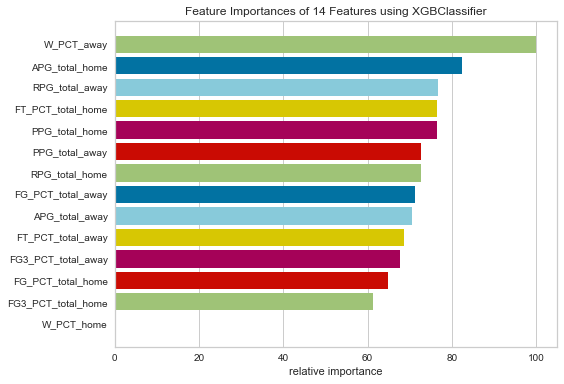

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({'gamma': 1}): 0.63
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       390
           1       0.56      0.41      0.48       270

    accuracy                           0.63       660
   macro avg       0.61      0.59      0.59       660
weighted avg       0.62      0.63      0.61       660



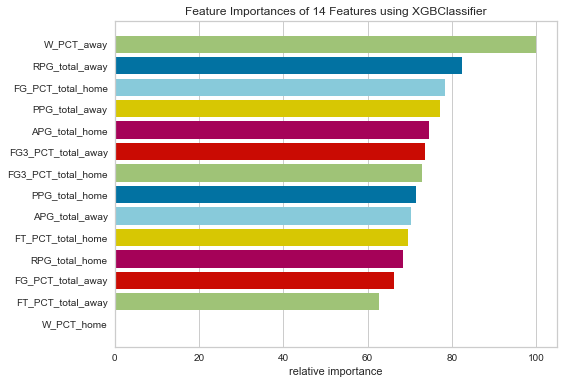

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({'gamma': 4}): 0.65
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       403
           1       0.59      0.36      0.45       256

    accuracy                           0.65       659
   macro avg       0.63      0.60      0.60       659
weighted avg       0.64      0.65      0.63       659



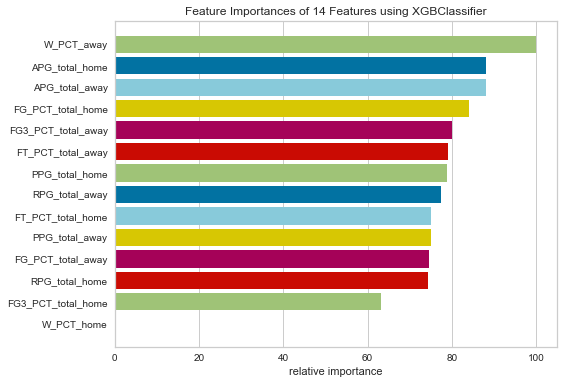

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({'gamma': 1}): 0.64
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       411
           1       0.53      0.40      0.45       248

    accuracy                           0.64       659
   macro avg       0.60      0.59      0.59       659
weighted avg       0.62      0.64      0.63       659



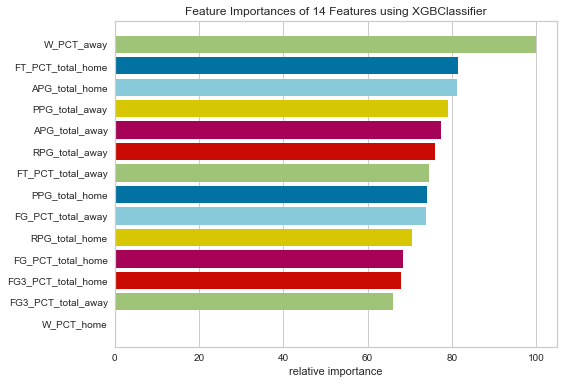

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({'gamma': 6}): 0.62
              precision    recall  f1-score   support

           0       0.63      0.87      0.73       391
           1       0.56      0.25      0.34       268

    accuracy                           0.62       659
   macro avg       0.60      0.56      0.54       659
weighted avg       0.60      0.62      0.57       659



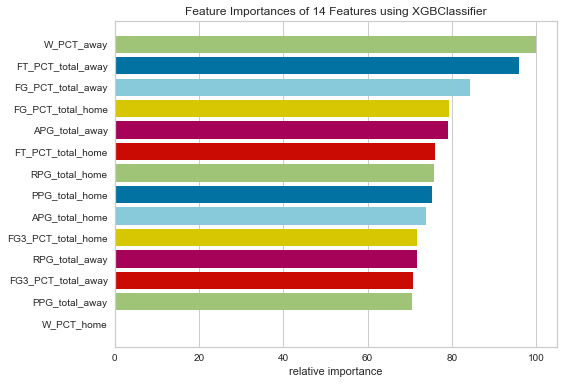

---------------------------------------------
Mean accuracy: 0.6459442681749207
Max accuracy: 0.6651515151515152
Min accuracy: 0.6257575757575757
i=25
REB:

Best XGBoost accuracy ({'gamma': 22}): 0.60
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       348
           1       0.00      0.00      0.00       230

    accuracy                           0.60       578
   macro avg       0.30      0.50      0.38       578
weighted avg       0.36      0.60      0.45       578



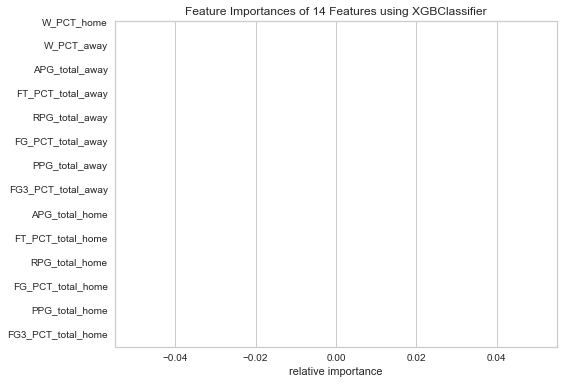

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({'gamma': 26}): 0.56
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       324
           1       0.00      0.00      0.00       254

    accuracy                           0.56       578
   macro avg       0.28      0.50      0.36       578
weighted avg       0.31      0.56      0.40       578



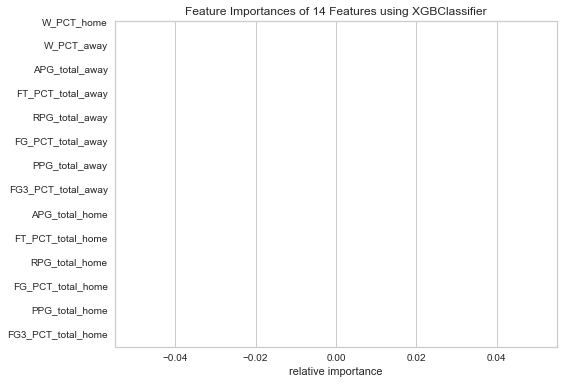

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({'gamma': 0}): 0.66
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       367
           1       0.54      0.50      0.52       210

    accuracy                           0.66       577
   macro avg       0.63      0.63      0.63       577
weighted avg       0.66      0.66      0.66       577



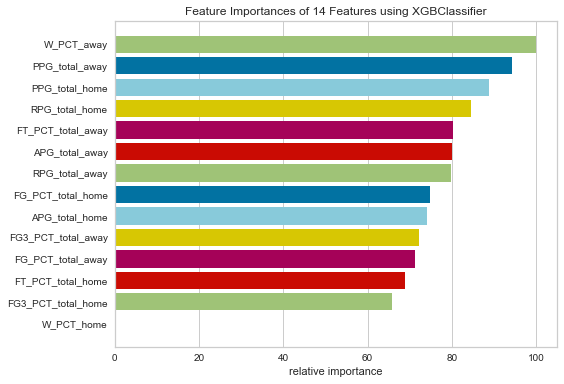

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({'gamma': 26}): 0.53
              precision    recall  f1-score   support

           0       0.53      1.00      0.70       308
           1       0.00      0.00      0.00       269

    accuracy                           0.53       577
   macro avg       0.27      0.50      0.35       577
weighted avg       0.28      0.53      0.37       577



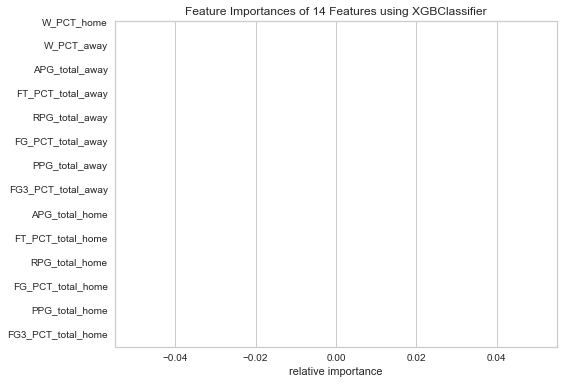

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({'gamma': 16}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.99      0.74       339
           1       0.50      0.02      0.04       238

    accuracy                           0.59       577
   macro avg       0.54      0.50      0.39       577
weighted avg       0.55      0.59      0.45       577



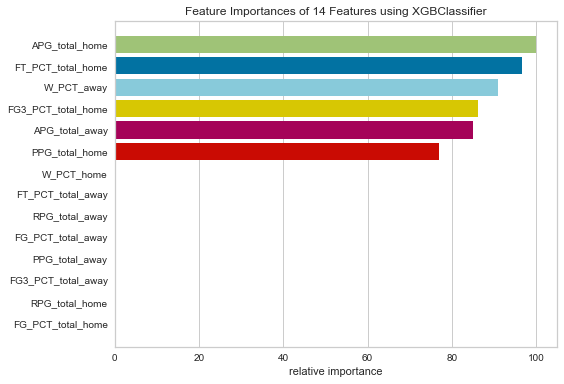

---------------------------------------------
Mean accuracy: 0.5896175780945471
Max accuracy: 0.6620450606585788
Min accuracy: 0.5337954939341422


In [32]:
# Minimum loss reduction required to make a further partition on a leaf node of the tree. 
# The larger gamma is, the more conservative the algorithm will be.

print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'gamma' : [*range(0,30)],
})

## Try prune scale_pos_weight

i=0
WINNER:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.69
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       627
           1       0.57      0.54      0.56       346

    accuracy                           0.69       973
   macro avg       0.66      0.66      0.66       973
weighted avg       0.69      0.69      0.69       973



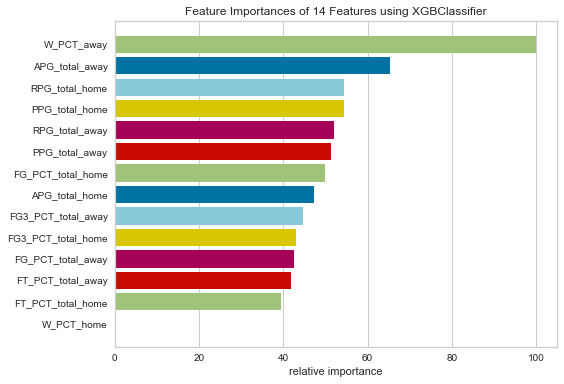

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.70
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       653
           1       0.55      0.49      0.52       320

    accuracy                           0.70       973
   macro avg       0.66      0.65      0.65       973
weighted avg       0.69      0.70      0.70       973



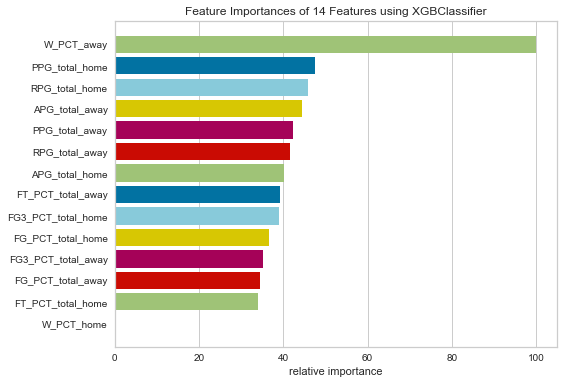

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({'scale_pos_weight': 3}): 0.69
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       596
           1       0.59      0.66      0.62       377

    accuracy                           0.69       973
   macro avg       0.68      0.69      0.68       973
weighted avg       0.70      0.69      0.70       973



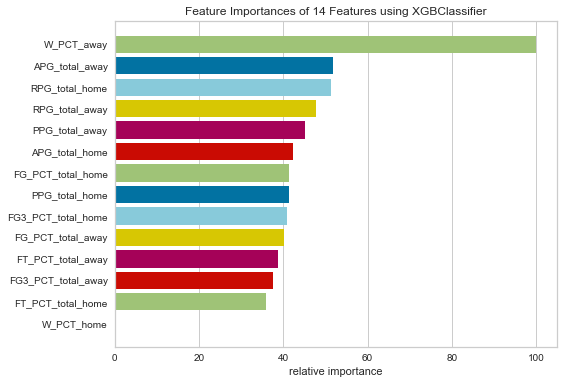

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({'scale_pos_weight': 0}): 0.67
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       648
           1       0.00      0.00      0.00       325

    accuracy                           0.67       973
   macro avg       0.33      0.50      0.40       973
weighted avg       0.44      0.67      0.53       973



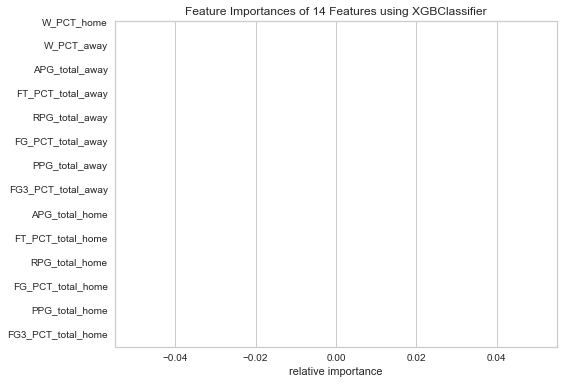

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({'scale_pos_weight': 7}): 0.67
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       606
           1       0.55      0.69      0.61       367

    accuracy                           0.67       973
   macro avg       0.67      0.68      0.67       973
weighted avg       0.69      0.67      0.68       973



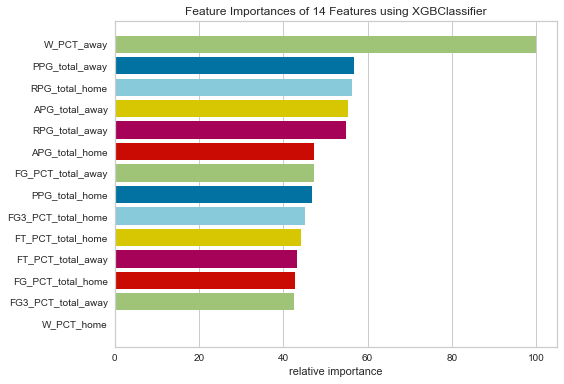

---------------------------------------------
Mean accuracy: 0.6888489208633094
Max accuracy: 0.7019527235354573
Min accuracy: 0.6659815005138746
i=5
FGP:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.65
              precision    recall  f1-score   support

           0       0.67      0.81      0.74       423
           1       0.59      0.41      0.48       279

    accuracy                           0.65       702
   macro avg       0.63      0.61      0.61       702
weighted avg       0.64      0.65      0.63       702



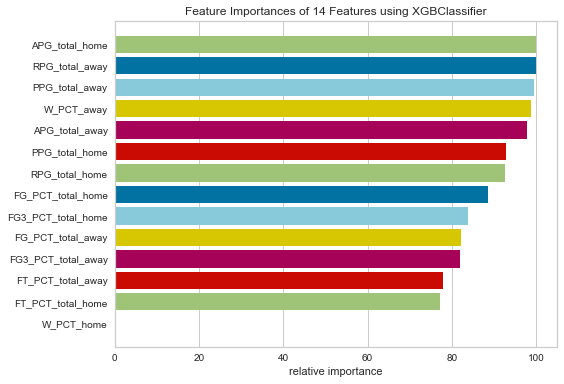

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.66
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       420
           1       0.57      0.57      0.57       282

    accuracy                           0.66       702
   macro avg       0.64      0.64      0.64       702
weighted avg       0.66      0.66      0.66       702



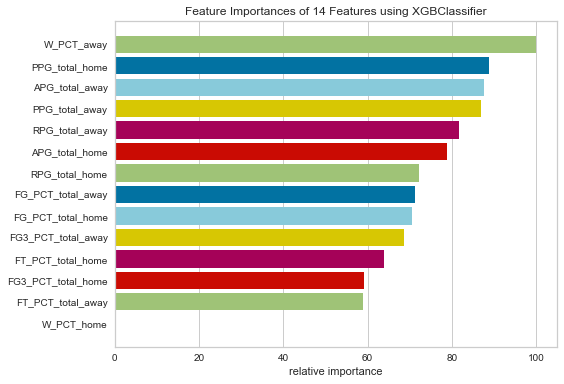

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.71
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       424
           1       0.63      0.62      0.62       278

    accuracy                           0.71       702
   macro avg       0.69      0.69      0.69       702
weighted avg       0.70      0.71      0.70       702



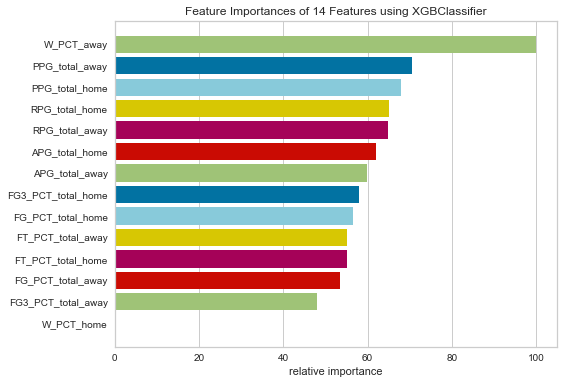

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.66
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       438
           1       0.57      0.40      0.47       263

    accuracy                           0.66       701
   macro avg       0.63      0.61      0.61       701
weighted avg       0.65      0.66      0.64       701



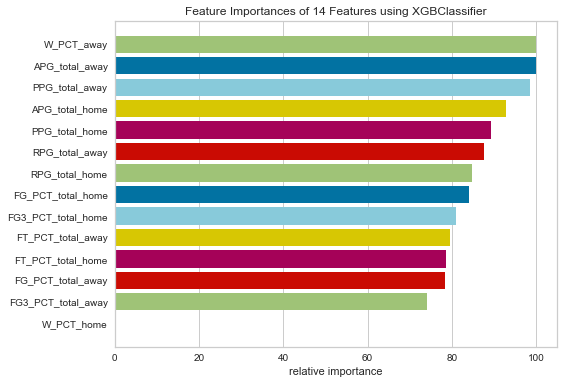

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({'scale_pos_weight': 3}): 0.71
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       418
           1       0.64      0.64      0.64       283

    accuracy                           0.71       701
   macro avg       0.69      0.69      0.69       701
weighted avg       0.71      0.71      0.71       701



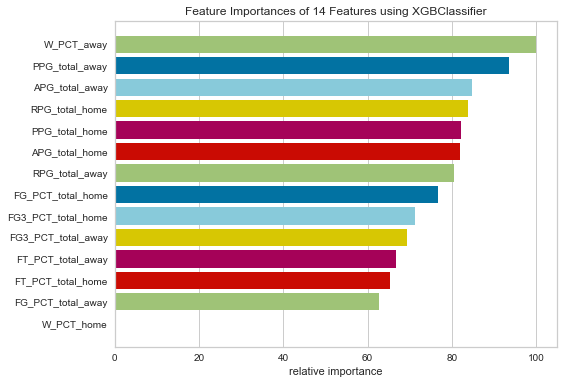

---------------------------------------------
Mean accuracy: 0.6679702581985036
Max accuracy: 0.7051282051282052
Min accuracy: 0.6495726495726496
i=10
FG3:

Best XGBoost accuracy ({'scale_pos_weight': 3}): 0.58
              precision    recall  f1-score   support

           0       0.63      0.46      0.53       231
           1       0.55      0.71      0.62       214

    accuracy                           0.58       445
   macro avg       0.59      0.58      0.57       445
weighted avg       0.59      0.58      0.57       445



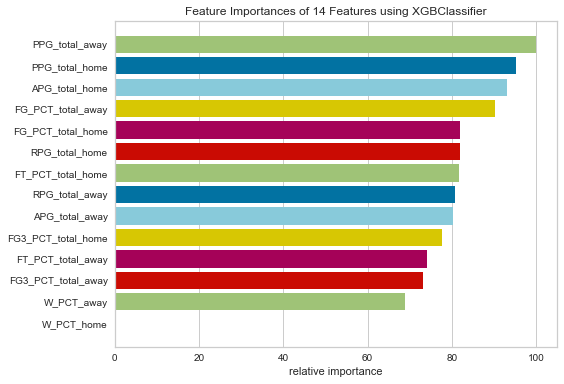

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.59
              precision    recall  f1-score   support

           0       0.65      0.53      0.58       240
           1       0.55      0.66      0.60       205

    accuracy                           0.59       445
   macro avg       0.60      0.60      0.59       445
weighted avg       0.60      0.59      0.59       445



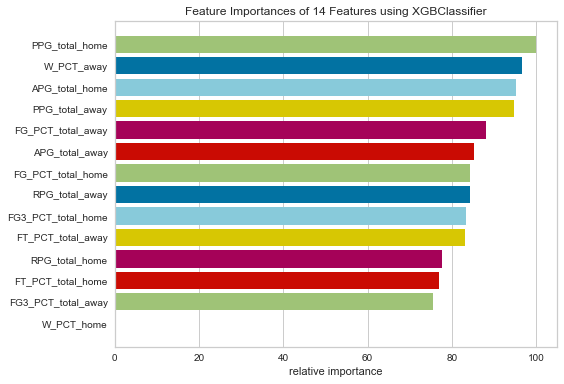

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({'scale_pos_weight': 4}): 0.56
              precision    recall  f1-score   support

           0       0.59      0.45      0.51       226
           1       0.54      0.67      0.60       219

    accuracy                           0.56       445
   macro avg       0.56      0.56      0.56       445
weighted avg       0.56      0.56      0.55       445



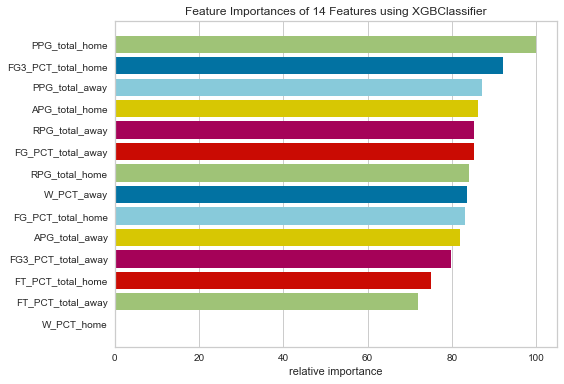

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.58
              precision    recall  f1-score   support

           0       0.60      0.56      0.58       227
           1       0.57      0.60      0.58       218

    accuracy                           0.58       445
   macro avg       0.58      0.58      0.58       445
weighted avg       0.58      0.58      0.58       445



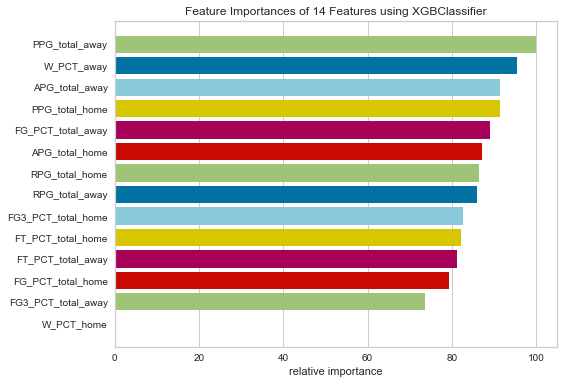

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({'scale_pos_weight': 4}): 0.58
              precision    recall  f1-score   support

           0       0.61      0.50      0.55       230
           1       0.55      0.67      0.60       215

    accuracy                           0.58       445
   macro avg       0.58      0.58      0.58       445
weighted avg       0.59      0.58      0.58       445



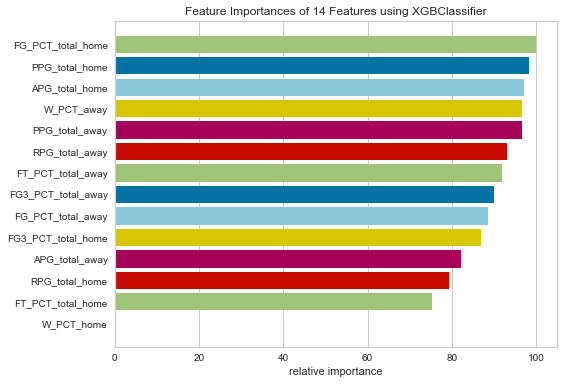

---------------------------------------------
Mean accuracy: 0.5775280898876405
Max accuracy: 0.5910112359550562
Min accuracy: 0.5595505617977528
i=15
FT:

Best XGBoost accuracy ({'scale_pos_weight': 24}): 0.57
              precision    recall  f1-score   support

           0       0.55      0.26      0.35       196
           1       0.58      0.83      0.68       244

    accuracy                           0.57       440
   macro avg       0.57      0.54      0.52       440
weighted avg       0.57      0.57      0.54       440



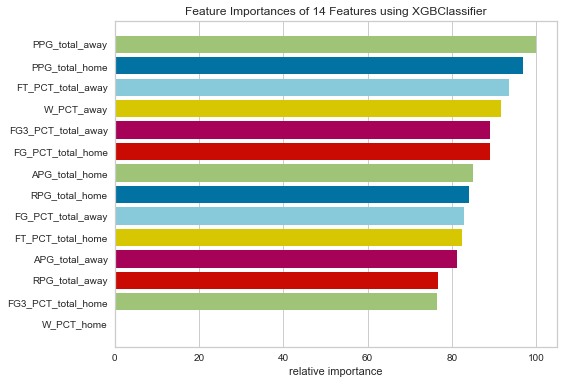

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({'scale_pos_weight': 11}): 0.54
              precision    recall  f1-score   support

           0       0.62      0.29      0.40       231
           1       0.51      0.80      0.62       208

    accuracy                           0.54       439
   macro avg       0.56      0.55      0.51       439
weighted avg       0.57      0.54      0.50       439



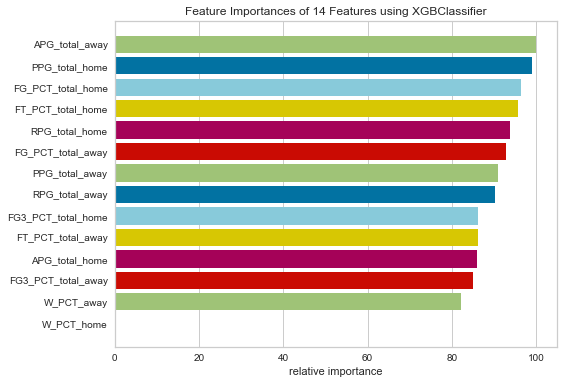

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({'scale_pos_weight': 4}): 0.59
              precision    recall  f1-score   support

           0       0.62      0.40      0.49       213
           1       0.58      0.77      0.66       226

    accuracy                           0.59       439
   macro avg       0.60      0.59      0.57       439
weighted avg       0.60      0.59      0.58       439



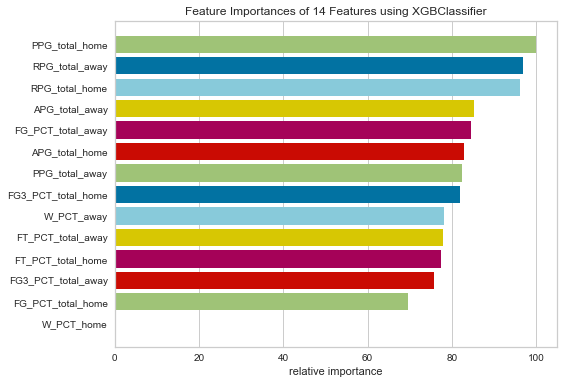

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({'scale_pos_weight': 5}): 0.59
              precision    recall  f1-score   support

           0       0.60      0.40      0.48       209
           1       0.58      0.76      0.66       230

    accuracy                           0.59       439
   macro avg       0.59      0.58      0.57       439
weighted avg       0.59      0.59      0.58       439



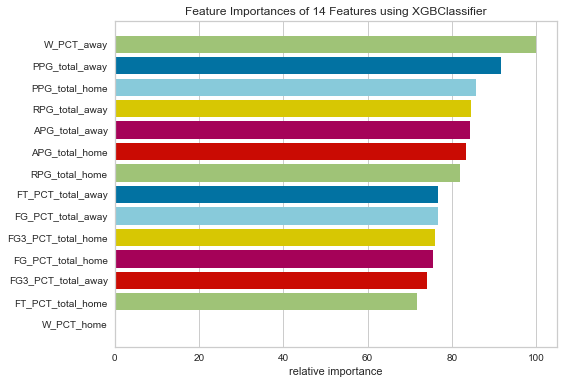

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({'scale_pos_weight': 5}): 0.62
              precision    recall  f1-score   support

           0       0.65      0.44      0.52       211
           1       0.60      0.79      0.68       228

    accuracy                           0.62       439
   macro avg       0.63      0.61      0.60       439
weighted avg       0.63      0.62      0.60       439



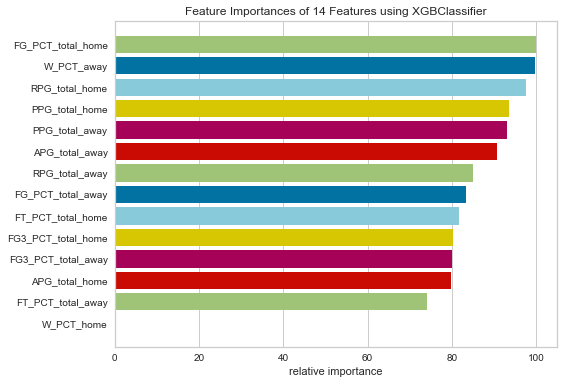

---------------------------------------------
Mean accuracy: 0.5731349658314351
Max accuracy: 0.592255125284738
Min accuracy: 0.5353075170842825
i=20
AST:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.67
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       388
           1       0.63      0.46      0.53       272

    accuracy                           0.67       660
   macro avg       0.65      0.63      0.64       660
weighted avg       0.66      0.67      0.65       660



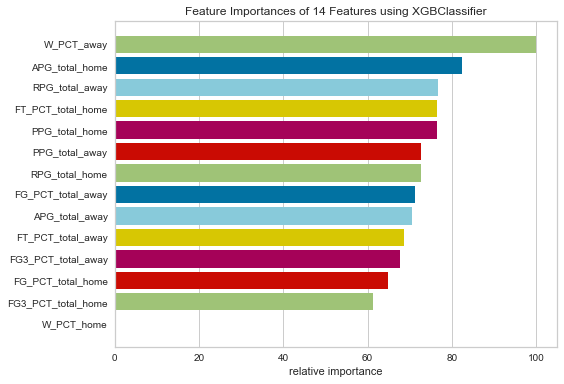

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({'scale_pos_weight': 7}): 0.63
              precision    recall  f1-score   support

           0       0.75      0.57      0.64       390
           1       0.54      0.72      0.62       270

    accuracy                           0.63       660
   macro avg       0.64      0.64      0.63       660
weighted avg       0.66      0.63      0.63       660



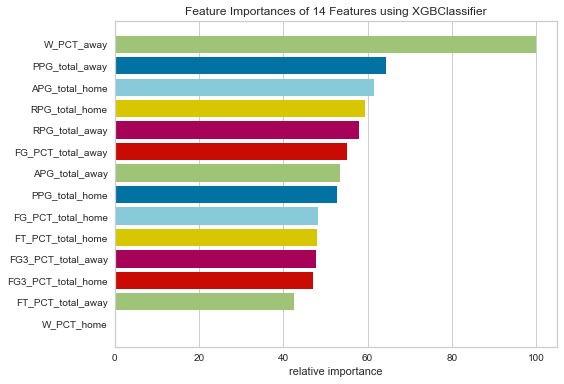

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({'scale_pos_weight': 6}): 0.61
              precision    recall  f1-score   support

           0       0.74      0.56      0.64       403
           1       0.50      0.70      0.58       256

    accuracy                           0.61       659
   macro avg       0.62      0.63      0.61       659
weighted avg       0.65      0.61      0.62       659



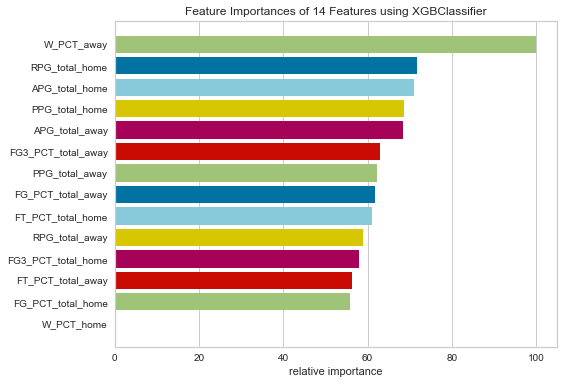

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.66
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       411
           1       0.56      0.46      0.50       248

    accuracy                           0.66       659
   macro avg       0.63      0.62      0.62       659
weighted avg       0.65      0.66      0.65       659



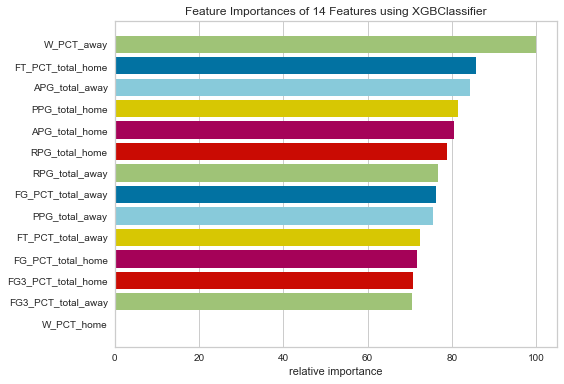

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.60
              precision    recall  f1-score   support

           0       0.65      0.68      0.67       391
           1       0.50      0.47      0.49       268

    accuracy                           0.60       659
   macro avg       0.58      0.58      0.58       659
weighted avg       0.59      0.60      0.59       659



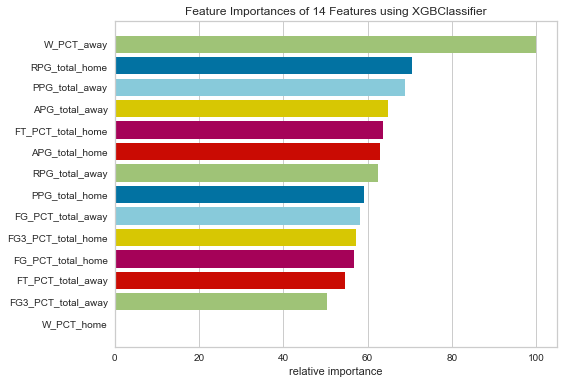

---------------------------------------------
Mean accuracy: 0.6413901917505863
Max accuracy: 0.6651515151515152
Min accuracy: 0.6115326251896813
i=25
REB:

Best XGBoost accuracy ({'scale_pos_weight': 8}): 0.61
              precision    recall  f1-score   support

           0       0.73      0.55      0.63       348
           1       0.50      0.69      0.58       230

    accuracy                           0.61       578
   macro avg       0.62      0.62      0.60       578
weighted avg       0.64      0.61      0.61       578



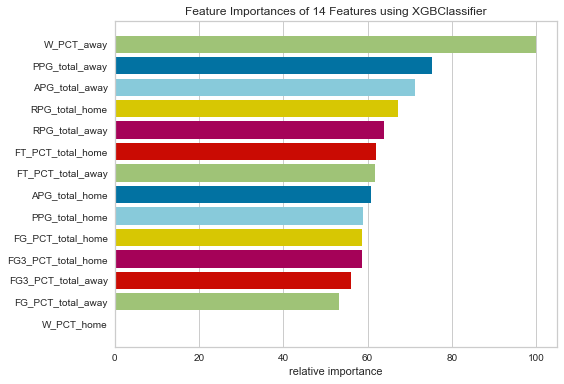

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.65
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       324
           1       0.61      0.56      0.58       254

    accuracy                           0.65       578
   macro avg       0.64      0.64      0.64       578
weighted avg       0.65      0.65      0.65       578



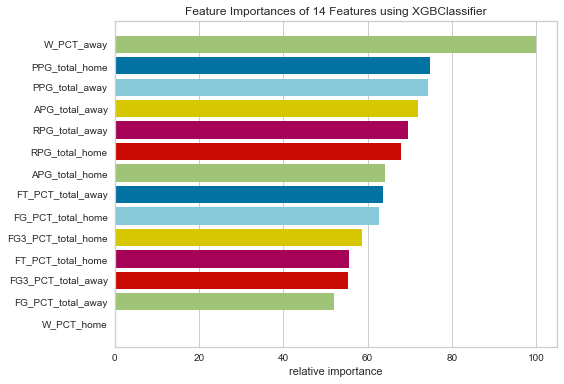

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.66
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       367
           1       0.54      0.50      0.52       210

    accuracy                           0.66       577
   macro avg       0.63      0.63      0.63       577
weighted avg       0.66      0.66      0.66       577



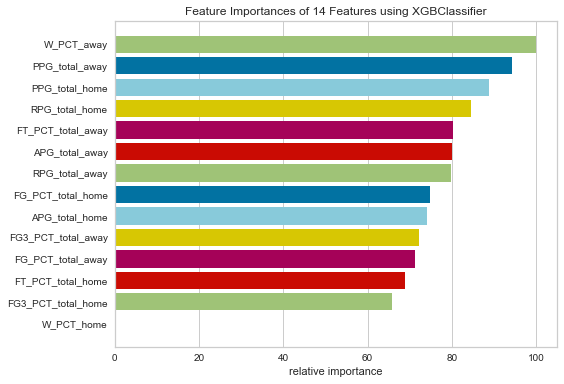

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({'scale_pos_weight': 0}): 0.53
              precision    recall  f1-score   support

           0       0.53      1.00      0.70       308
           1       0.00      0.00      0.00       269

    accuracy                           0.53       577
   macro avg       0.27      0.50      0.35       577
weighted avg       0.28      0.53      0.37       577



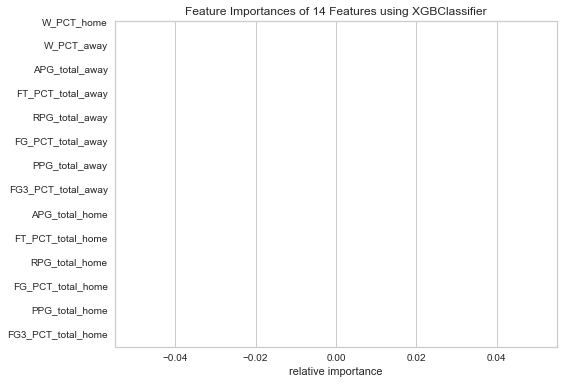

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({'scale_pos_weight': 4}): 0.61
              precision    recall  f1-score   support

           0       0.69      0.60      0.65       339
           1       0.52      0.62      0.57       238

    accuracy                           0.61       577
   macro avg       0.61      0.61      0.61       577
weighted avg       0.62      0.61      0.61       577



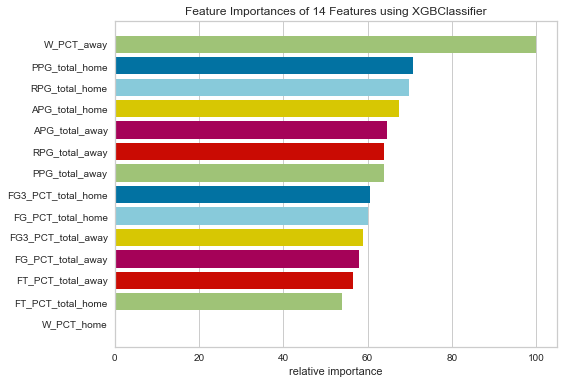

---------------------------------------------
Mean accuracy: 0.612541453527073
Max accuracy: 0.6620450606585788
Min accuracy: 0.5337954939341422


In [33]:
# Control the balance of positive and negative weights, useful for unbalanced classes. 
# A typical value to consider: sum(negative instances) / sum(positive instances).

print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'scale_pos_weight' : [*range(0,30)],
})